# **Forecasting FAOStat Dataset**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [227]:
#import pmdarima as pm

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
#import ydata_profiling as pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA

from pmdarima.arima import auto_arima
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pickle


In [229]:


# Change the file path to the location where your CSV file is stored
file_path = 'Consumer prices indicators - FAOSTAT_data_en_2-22-2024 (1).csv'

# Read the CSV file
df1 = pd.read_csv(file_path)


In [230]:
import pandas as pd

# Change the file path to the location where your CSV file is stored
file_path = 'Crops production indicators - FAOSTAT_data_en_2-22-2024 (1).csv'

# Read the CSV file
df2 = pd.read_csv(file_path)

In [231]:
import pandas as pd

# Change the file path to the location where your CSV file is stored
file_path = 'Emissions - FAOSTAT_data_en_2-27-2024.csv'

# Read the CSV file
df3 = pd.read_csv(file_path)

In [232]:
# Change the file path to the location where your CSV file is stored
file_path = 'Employment - FAOSTAT_data_en_2-27-2024.csv'

# Read the CSV file
df4 = pd.read_csv(file_path)

In [233]:
# Change the file path to the location where your CSV file is stored
file_path = 'Exchange rate - FAOSTAT_data_en_2-22-2024.csv'

# Read the CSV file
df5 = pd.read_csv(file_path)

In [234]:
# Change the file path to the location where your CSV file is stored
file_path = 'Fertilizers use - FAOSTAT_data_en_2-27-2024.csv'

# Read the CSV file
df6 = pd.read_csv(file_path)

In [235]:
# Change the file path to the location where your CSV file is stored
file_path = 'Food balances indicators - FAOSTAT_data_en_2-22-2024 (1).csv'

# Read the CSV file
df7 = pd.read_csv(file_path)

In [236]:
# Change the file path to the location where your CSV file is stored
file_path = 'Food security indicators  - FAOSTAT_data_en_2-22-2024.csv'

# Read the CSV file
df8 = pd.read_csv(file_path)

In [4]:
# Change the file path to the location where your CSV file is stored
file_path = 'Food trade indicators - FAOSTAT_data_en_2-22-2024.csv'

# Read the CSV file
df9 = pd.read_csv(file_path)

In [3]:
# Change the file path to the location where your CSV file is stored
file_path = 'Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv'

# Read the CSV file
df10 = pd.read_csv(file_path)

In [239]:
# Change the file path to the location where your CSV file is stored
file_path = 'Land temperature change - FAOSTAT_data_en_2-27-2024.csv'

# Read the CSV file
df11 = pd.read_csv(file_path)

In [240]:
# Change the file path to the location where your CSV file is stored
file_path = 'Land use - FAOSTAT_data_en_2-22-2024.csv'

df12 = pd.read_csv(file_path, on_bad_lines='skip')



In [241]:
# Change the file path to the location where your CSV file is stored
file_path = 'Pesticides use - FAOSTAT_data_en_2-27-2024.csv'

# Read the CSV file
df13 = pd.read_csv(file_path)

In [242]:
def crops(df):
    
    # List of actual crop/agricultural products
    crop_items = [
        'Cereals, primary', 'Citrus Fruit, Total',
           'Fibre Crops, Fibre Equivalent', 'Fruit Primary',
           'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
           'Pulses, Total', 'Roots and Tubers, Total', 'Sugar Crops Primary',
           'Treenuts, Total', 'Vegetables Primary',  

         'Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
            'Pulses', 'Treenuts', 'Oilcrops',
           'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
           'Stimulants', 'Spices', "Tobacco",

        'Cereals and Preparations', 'Fats and Oils (excluding Butter)',
            'Sugar and Honey', 'Fruit and Vegetables',  'Non-edible Fats and Oils',
    ]
    
    df[df['Item'].isin(crop_items)]
    
    return df
    

In [243]:
def rename(df):
    
    columns = {"Domain Code" : "Domain_Code",
               "Area Code (M49)" : "Area_Code",
               "Year Code" : "Year_Code",
               "Item Code" : "Item_Code",
               "Months Code" : "Months_Code",
               "Element Code" : "Element_Code",
               "Flag Description" : "Flag_Description",

               "Item Code (CPC)" : "Item_Code",
               "Sex Code" : "Sex_Code",
               "Source Code" : "Source_Code",
               "Indicator Code" : "Indicator_Code",
               "ISO Currency Code (FAO)" : "Currency_Code",
               "Item Code (FBS)" : "Item_Code"



              }
    df.rename(columns=columns,inplace=True)

In [244]:
def removee(df):
  if "Year_Code" in df.columns:
    df.drop(columns=["Year_Code"],inplace=True)
  if "Months_Code" in df.columns:
    df.drop(columns=["Months_Code"],inplace=True)
  if "Flag_Description" in df.columns:
    df.drop(columns=["Flag_Description"],inplace=True)
  if "Flag" in df.columns:
    df.drop(columns=["Flag"],inplace=True)
  if "Note" in df.columns:
    df.drop(columns=["Note"],inplace=True)
  if "Sex" in df.columns:
   df.drop(columns=["Sex"],inplace=True)
  if "Sex_Code" in df.columns:
   df.drop(columns=["Sex_Code"],inplace=True)
  if "Source" in df.columns:
   df.drop(columns=["Source"],inplace=True)
  if "Source_Code" in df.columns:
   df.drop(columns=["Source_Code"],inplace=True)
  if "Area" in df.columns:
   df.drop(columns=["Area"],inplace=True)

  if "Indicator_Code" in df.columns:
   df.drop(columns=["Indicator_Code"],inplace=True)
  if "Indicator" in df.columns:
   df.drop(columns=["Indicator"],inplace=True)
  if "Currency_Code" in df.columns:
   df.drop(columns=["Currency_Code"],inplace=True)
  if "Currency" in df.columns:
   df.drop(columns=["Currency"],inplace=True)
  if "Months" in df.columns:
   df.drop(columns=["Months"],inplace=True)
  return df

In [245]:
def remove(df):
    columns_to_remove = [
        "Year_Code", "Months_Code", "Flag_Description", "Flag", "Note", "Sex",
        "Sex_Code", "Source", "Source_Code", "Area", "Indicator_Code", "Indicator",
        "Currency_Code", "Currency", "Months"
    ]
    # Using a list comprehension to filter out columns present in the dataframe
    cols_to_drop = [col for col in columns_to_remove if col in df.columns]
    df.drop(columns=cols_to_drop, inplace=True)
    return df

In [246]:
import pandas as pd

class Datadiscribe:
    def __init__(self, df):
        self.df = df
    
    def uniq(self):

        return {column: pd.unique(self.df[column]) for column in self.df.columns}


    def missing_values(self):
        return self.df.isnull().sum()

    def value_counts(self):
        return {column: self.df[column].value_counts() for column in self.df.columns}

    def dtypes(self):
        return self.df.dtypes


    def datetime(self, column):
        self.df[column] = pd.to_datetime(self.df[column])

    def index(self, column):
        self.df.set_index(column, inplace=True)

    def sort(self):
        self.df.sort_index(inplace=True)

    def summary(self):
        return self.df.describe()

    def info(self):
        return self.df.info()


# df1

In [247]:
df1.head(10)

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,NaN,24.356332,I,Imputed value,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,NaN,23.636242,I,Imputed value,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,NaN,23.485345,I,Imputed value,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,NaN,24.767194,I,Imputed value,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,NaN,25.956912,I,Imputed value,base year is 2015
5,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7006,June,6125,Value,NaN,25.067091,I,Imputed value,base year is 2015
6,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7007,July,6125,Value,NaN,26.203187,I,Imputed value,base year is 2015
7,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7008,August,6125,Value,NaN,28.706720,I,Imputed value,base year is 2015
8,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7009,September,6125,Value,NaN,30.529086,I,Imputed value,base year is 2015
9,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7010,October,6125,Value,NaN,28.749616,I,Imputed value,base year is 2015


In [248]:
df1_uniq = Datadiscribe(df1)

df1_uniq.uniq()

{'Domain Code': array(['CP'], dtype=object),
 'Domain': array(['Consumer Price Indices'], dtype=object),
 'Area Code (M49)': array([  4, 248,   8,  12,  20,  24, 660,  28,  32,  51, 533,  36,  40,
         31,  44,  48,  50,  52, 112,  56,  84, 204,  60,  64,  68,  70,
         72,  76,  92,  96, 100, 854, 108, 132, 116, 120, 124, 136, 148,
        152, 344, 446, 156, 170, 174, 178, 184, 188, 384, 191, 531, 196,
        203, 180, 208, 262, 212, 214, 218, 818, 222, 226, 233, 748, 231,
        242, 246, 250, 254, 258, 266, 270, 268, 276, 288, 300, 304, 308,
        312, 316, 320, 324, 624, 332, 340, 348, 352, 356, 360, 364, 368,
        372, 376, 380, 388, 392, 400, 398, 404, 296, 414, 417, 418, 428,
        422, 426, 430, 434, 440, 442, 450, 454, 458, 462, 466, 470, 474,
        478, 480, 484, 583, 496, 499, 500, 504, 508, 104, 516, 524, 528,
        540, 554, 558, 562, 566, 807, 578, 512, 586, 585, 275, 591, 598,
        600, 604, 608, 616, 620, 630, 634, 410, 498, 638, 642, 643, 646,


In [249]:

df1 = df1.groupby(['Area Code (M49)', 'Year', 'Item']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df1.head()

,Area Code (M49),Year,Item,Value
0,4,2000,"Consumer Prices, Food Indices (2015 = 100)",319.558176
1,4,2001,"Consumer Prices, Food Indices (2015 = 100)",358.722573
2,4,2001,Food price inflation,153.368307
3,4,2002,"Consumer Prices, Food Indices (2015 = 100)",424.138702
4,4,2002,Food price inflation,219.054193


In [250]:
columns = {"Area Code (M49)" : "Area"
           



            }
df1.rename(columns=columns,inplace=True)

In [251]:
# Pivot the data to have separate columns for each item type
df1 = df1.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', aggfunc='first')

# Reset index to flatten the DataFrame
df1.reset_index(inplace=True)

# Show the new DataFrame
df1.head()


Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation
0,4,2000,319.558176,NaN
1,4,2001,358.722573,153.368307
2,4,2002,424.138702,219.054193
3,4,2003,482.437360,169.226933
4,4,2004,550.086733,168.866060


In [252]:


# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with NaN values
nan_rows = df1[df1.isna().any(axis=1)]

# Print the areas, years, and columns that have NaN values
for index, row in nan_rows.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, NaN Columns: {nan_columns}')


Area: 4.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 8.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 12.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 20.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 24.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 28.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 31.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 32.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 36.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 40.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 44.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 48.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 50.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 51.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 52.0, Year: 2000.0, NaN Columns: ['Food price inflation']
Area: 56.0, Year: 2000.0, NaN Columns: ['F

In [253]:
# Define a function to fill NaN values with the first non-null value for the same country and column
def fill_nan_with_first_non_null(df, column):
    # Forward fill within each 'Area' group, then backward fill to ensure all NaNs are filled
    # We use `transform` instead of `apply` to ensure the result aligns with the original DataFrame's index
    df[column] = df.groupby('Area')[column].transform(lambda x: x.ffill().bfill())
    return df

# Apply the function to all columns, except 'Area' and 'Year'
for column in [col for col in df1.columns if col not in ['Area', 'Year']]:
    df1 = fill_nan_with_first_non_null(df1, column)




In [254]:
nan_rows = df1[df1.isna().any(axis=1)]

# Print the areas, years, and columns that have NaN values
for index, row in nan_rows.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, NaN Columns: {nan_columns}')


In [255]:
def fill_with_neighbor_mean(df, area, target_year, column):
    # Create a copy of the DataFrame to avoid modifying the original
    modified_df = df.copy()

    # Check if the surrounding years' data is available
    if ((modified_df[(modified_df['Area'] == area) & (modified_df['Year'] == target_year - 1)][column].notna().any()) and 
        (modified_df[(modified_df['Area'] == area) & (modified_df['Year'] == target_year + 1)][column].notna().any())):
        
        # Calculate the mean of the year before and after
        mean_value = (modified_df[(modified_df['Area'] == area) & (modified_df['Year'] == target_year - 1)][column].values[0] +
                      modified_df[(modified_df['Area'] == area) & (modified_df['Year'] == target_year + 1)][column].values[0]) / 2
        
        # Fill the NaN value with the calculated mean
        modified_df.loc[(modified_df['Area'] == area) & (modified_df['Year'] == target_year), column] = mean_value

    # Return the modified DataFrame
    return modified_df

In [256]:
def fill_with_neighbor(df, area, target_year, column):
    # Create a copy of the DataFrame to avoid modifying the original
    modified_df = df.copy()

    # Check if the surrounding years' data is available
    if ((modified_df[(modified_df['Area'] == area) & (modified_df['Year'] == target_year + 1)][column].notna().any()) 
        ):
        
        # Calculate the mean of the year before and after
        value = (modified_df[(modified_df['Area'] == area) & (modified_df['Year'] == target_year + 1)][column].values[0] )
                      
        
        # Fill the NaN value with the calculated mean
        modified_df.loc[(modified_df['Area'] == area) & (modified_df['Year'] == target_year), column] = value

    # Return the modified DataFrame
    return modified_df

In [257]:
columns = {"Consumer Prices, Food Indices (2015 = 100)" : "Consumer_Prices",
           "Food price inflation" : "Food_inflation"



            }
df1.rename(columns=columns,inplace=True)

In [258]:
df1.head(5)

Item,Area,Year,Consumer_Prices,Food_inflation
0,4,2000,319.558176,153.368307
1,4,2001,358.722573,153.368307
2,4,2002,424.138702,219.054193
3,4,2003,482.437360,169.226933
4,4,2004,550.086733,168.866060


In [259]:
df1.shape

(4856, 4)

In [260]:

# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with NaN values
nan_rows = df1[df1.isna().any(axis=1)]

# Print the areas, years, and columns that have NaN values
for index, row in nan_rows.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, NaN Columns: {nan_columns}')

# df2

In [261]:
df2.head(10)



,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN
5,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2005,2005,100 g/ha,17904,A,Official figure,NaN
6,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2006,2006,100 g/ha,15517,A,Official figure,NaN
7,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2007,2007,100 g/ha,19153,A,Official figure,NaN
8,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2008,2008,100 g/ha,14554,A,Official figure,NaN
9,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2009,2009,100 g/ha,20407,A,Official figure,NaN


In [262]:
df2_uniq = Datadiscribe(df2)

df2_uniq.uniq()

{'Domain Code': array(['QCL'], dtype=object),
 'Domain': array(['Crops and livestock products'], dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  24,  28,  32,  51,  36,  40,  31,  44,  48,  50,
         52, 112,  56,  84, 204,  64,  68,  70,  72,  76,  96, 100, 854,
        108, 132, 116, 120, 124, 140, 148, 152, 159, 344, 156, 158, 170,
        174, 178, 184, 188, 384, 191, 192, 196, 203, 408, 180, 208, 262,
        212, 214, 218, 818, 222, 226, 232, 233, 748, 231, 234, 242, 246,
        250, 254, 258, 266, 270, 268, 276, 288, 300, 308, 312, 320, 324,
        624, 328, 332, 340, 348, 352, 356, 360, 364, 368, 372, 376, 380,
        388, 392, 400, 398, 404, 296, 414, 417, 418, 428, 422, 426, 430,
        434, 440, 442, 450, 454, 458, 462, 466, 470, 584, 474, 478, 480,
        484, 583, 496, 499, 504, 508, 104, 516, 520, 524, 528, 540, 554,
        558, 562, 566, 570, 807, 578, 512, 586, 275, 591, 598, 600, 604,
        608, 616, 620, 630, 634, 410, 498, 638, 642, 643, 646, 659

In [263]:

df2 = df2.groupby(['Area Code (M49)', 'Year']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df2.head()

,Area Code (M49),Year,Value
0,4,2000,661957
1,4,2001,667714
2,4,2002,672489
3,4,2003,673301
4,4,2004,675944


In [264]:
columns = {"Value" : "yield",
           'Area Code (M49)' : 'Area'




            }
df2.rename(columns=columns,inplace=True)

In [265]:
df2.head()

,Area,Year,yield
0,4,2000,661957
1,4,2001,667714
2,4,2002,672489
3,4,2003,673301
4,4,2004,675944


In [266]:


# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with NaN values
nan_rows = df2[df2.isna().any(axis=1)]

# Print the areas, years, and columns that have NaN values
for index, row in nan_rows.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, NaN Columns: {nan_columns}')

In [267]:
zero_rows = df2[(df2['yield'] == 0) ]


# Print the areas, years, and columns that have zero values
for index, row in zero_rows.iterrows():
    zero_columns = row[row == 0].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, zero Columns: {zero_columns}')

# df3

In [268]:
df3.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,0.7056,E,Estimated value,NaN
1,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,20.8471,E,Estimated value,NaN
2,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,0.7054,E,Estimated value,NaN
3,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,19.2605,E,Estimated value,NaN
4,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2002,2002,3050,FAO TIER 1,kt,1.0656,E,Estimated value,NaN


In [269]:
df3_uniq = Datadiscribe(df3)

df3_uniq.uniq()

{'Domain Code': array(['GCE', 'GV'], dtype=object),
 'Domain': array(['Emissions from Crops', 'Emissions from Drained organic soils'],
       dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  24,  28,  32,  51,  36,  40,  31,  44,  48,  50,
         52, 112,  56,  84, 204,  64,  68,  70,  72,  76,  96, 100, 854,
        108, 132, 116, 120, 124, 140, 148, 152, 159, 344, 156, 158, 170,
        174, 178, 188, 384, 191, 192, 196, 203, 408, 180, 208, 262, 212,
        214, 218, 818, 222, 232, 233, 748, 231, 234, 242, 246, 250, 254,
        258, 266, 270, 268, 276, 288, 300, 308, 312, 320, 324, 624, 328,
        332, 340, 348, 352, 356, 360, 364, 368, 372, 376, 380, 388, 392,
        400, 398, 404, 414, 417, 418, 428, 422, 426, 430, 434, 440, 442,
        450, 454, 458, 462, 466, 470, 474, 478, 480, 484, 583, 496, 499,
        504, 508, 104, 516, 524, 528, 540, 554, 558, 562, 566, 807, 578,
        512, 586, 275, 591, 598, 600, 604, 608, 616, 620, 630, 634, 410,
        498, 638, 642

In [270]:
df3 = df3.groupby(['Area Code (M49)', 'Year','Element', 'Domain']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df3.head()

,Area Code (M49),Year,Element,Domain,Value
0,4,2000,Crops total (Emissions CH4),Emissions from Crops,20.8471
1,4,2000,Crops total (Emissions N2O),Emissions from Crops,0.7056
2,4,2000,Emissions (CO2),Emissions from Drained organic soils,0.0000
3,4,2000,Emissions (N2O),Emissions from Drained organic soils,0.0000
4,4,2001,Crops total (Emissions CH4),Emissions from Crops,19.2605


In [271]:

columns = {"Area Code (M49)" : "Area"



            }
df3.rename(columns=columns,inplace=True)



In [272]:

df3 = df3.groupby(['Area', 'Year']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df3.head()

,Area,Year,Value
0,4,2000,21.5527
1,4,2001,19.9659
2,4,2002,22.3209
3,4,2003,25.0134
4,4,2004,31.3945


In [273]:
columns = {"Value" : "emission"



            }
df3.rename(columns=columns,inplace=True)

# Show the new DataFrame
df3.head()

,Area,Year,emission
0,4,2000,21.5527
1,4,2001,19.9659
2,4,2002,22.3209
3,4,2003,25.0134
4,4,2004,31.3945


In [274]:

# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with zero values

zero_rows = df3[(df3['emission'] == 0) ]


# Print the areas, years, and columns that have zero values
for index, row in zero_rows.iterrows():
    zero_columns = row[row == 0].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, zero Columns: {zero_columns}')

Area: 16.0, Year: 2000.0, zero Columns: ['emission']
Area: 16.0, Year: 2001.0, zero Columns: ['emission']
Area: 16.0, Year: 2002.0, zero Columns: ['emission']
Area: 16.0, Year: 2003.0, zero Columns: ['emission']
Area: 16.0, Year: 2004.0, zero Columns: ['emission']
Area: 16.0, Year: 2005.0, zero Columns: ['emission']
Area: 16.0, Year: 2006.0, zero Columns: ['emission']
Area: 16.0, Year: 2007.0, zero Columns: ['emission']
Area: 16.0, Year: 2008.0, zero Columns: ['emission']
Area: 16.0, Year: 2009.0, zero Columns: ['emission']
Area: 16.0, Year: 2010.0, zero Columns: ['emission']
Area: 16.0, Year: 2011.0, zero Columns: ['emission']
Area: 16.0, Year: 2012.0, zero Columns: ['emission']
Area: 16.0, Year: 2013.0, zero Columns: ['emission']
Area: 16.0, Year: 2014.0, zero Columns: ['emission']
Area: 16.0, Year: 2015.0, zero Columns: ['emission']
Area: 16.0, Year: 2016.0, zero Columns: ['emission']
Area: 16.0, Year: 2017.0, zero Columns: ['emission']
Area: 16.0, Year: 2018.0, zero Columns: ['emis

In [275]:
nan_rows = df3[df3.isna().any(axis=1)]

# Print the areas, years, and columns that have NaN values
for index, row in nan_rows.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, NaN Columns: {nan_columns}')

# df4

In [276]:
df4.head(4)

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations,NaN
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations,NaN


In [277]:
df4_uniq = Datadiscribe(df4)

df4_uniq.uniq()

{'Domain Code': array(['OEA'], dtype=object),
 'Domain': array(['Employment Indicators: Agriculture'], dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  24,  32,  51, 533,  36,  40,  31,  44,  48,  50,
         52, 112,  56,  84, 204,  60,  64,  68,  70,  72,  76,  96, 100,
        854, 108, 132, 116, 120, 124, 136, 140, 148, 830, 152, 159, 344,
        446, 156, 158, 170, 174, 178, 184, 188, 384, 191, 192, 531, 196,
        203, 408, 180, 208, 262, 214, 218, 818, 222, 226, 232, 233, 748,
        231, 238, 242, 246, 250, 258, 266, 270, 268, 276, 288, 300, 316,
        320, 324, 624, 328, 332, 340, 348, 352, 356, 360, 364, 368, 372,
        833, 376, 380, 388, 392, 832, 400, 398, 404, 296, 414, 417, 418,
        428, 422, 426, 430, 434, 440, 442, 450, 454, 458, 462, 466, 470,
        584, 478, 480, 484, 583, 496, 499, 500, 504, 508, 104, 516, 520,
        524, 528, 540, 554, 558, 562, 566, 807, 578, 512, 586, 585, 275,
        591, 598, 600, 604, 608, 616, 620, 630, 634, 410, 49

In [278]:

df4 = df4.groupby(['Area Code (M49)', 'Year', 'Indicator']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df4.head()

,Area Code (M49),Year,Indicator,Value
0,4,2000,"Employment in agriculture, forestry and fishin...",2765.95
1,4,2001,"Employment in agriculture, forestry and fishin...",2805.54
2,4,2002,"Employment in agriculture, forestry and fishin...",2897.51
3,4,2003,"Employment in agriculture, forestry and fishin...",3093.27
4,4,2004,"Employment in agriculture, forestry and fishin...",3212.46


In [279]:

columns = {"Area Code (M49)" : "Area"



            }
df4.rename(columns=columns,inplace=True)



In [280]:
# Pivot the data to have separate columns for each item type
df4 = df4.pivot_table(index=['Area', 'Year'], columns='Indicator', values='Value', aggfunc='first')

# Reset index to flatten the DataFrame
df4.reset_index(inplace=True)

# Show the new DataFrame
df4.head()


Indicator,Area,Year,"Employment in agriculture, forestry and fishing - ILO modelled estimates","Mean weekly hours actually worked per employed person in agriculture, forestry and fishing"
0,4,2000,2765.95,NaN
1,4,2001,2805.54,NaN
2,4,2002,2897.51,NaN
3,4,2003,3093.27,NaN
4,4,2004,3212.46,NaN


In [281]:
# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with NaN values
nan_rows = df4[df4.isna().any(axis=1)]

# Print the areas, years, and columns that have NaN values
for index, row in nan_rows.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, NaN Columns: {nan_columns}')


Area: 4.0, Year: 2000.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 4.0, Year: 2001.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 4.0, Year: 2002.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 4.0, Year: 2003.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 4.0, Year: 2004.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 4.0, Year: 2005.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 4.0, Year: 2006.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 4.0, Year: 2007.0, NaN Columns: ['Mean weekly hours actually wo

In [282]:
df4.head(20)

Indicator,Area,Year,"Employment in agriculture, forestry and fishing - ILO modelled estimates","Mean weekly hours actually worked per employed person in agriculture, forestry and fishing"
0,4,2000,2765.95,NaN
1,4,2001,2805.54,NaN
2,4,2002,2897.51,NaN
3,4,2003,3093.27,NaN
4,4,2004,3212.46,NaN
5,4,2005,3287.47,NaN
6,4,2006,3406.43,NaN
7,4,2007,3352.45,NaN
8,4,2008,3367.11,NaN
9,4,2009,3366.89,NaN


In [283]:


# Define a function to fill NaN values with the first non-null value for the same country and column
def fill_nan_with_first_non_null(df, column):
    # Forward fill within each 'Area' group, then backward fill to ensure all NaNs are filled
    # We use `transform` instead of `apply` to ensure the result aligns with the original DataFrame's index
    df[column] = df.groupby('Area')[column].transform(lambda x: x.ffill().bfill())
    return df

# Apply the function to all columns, except 'Area' and 'Year'
for column in [col for col in df4.columns if col not in ['Area', 'Year']]:
    df4 = fill_nan_with_first_non_null(df4, column)


In [284]:
df4.head(20)

Indicator,Area,Year,"Employment in agriculture, forestry and fishing - ILO modelled estimates","Mean weekly hours actually worked per employed person in agriculture, forestry and fishing"
0,4,2000,2765.95,31.68
1,4,2001,2805.54,31.68
2,4,2002,2897.51,31.68
3,4,2003,3093.27,31.68
4,4,2004,3212.46,31.68
5,4,2005,3287.47,31.68
6,4,2006,3406.43,31.68
7,4,2007,3352.45,31.68
8,4,2008,3367.11,31.68
9,4,2009,3366.89,31.68


In [285]:
nan_counts = df4.isna().sum()

print(nan_counts)

Indicator
Area                                                                                            0
Year                                                                                            0
Employment in agriculture, forestry and fishing - ILO modelled estimates                       34
Mean weekly hours actually worked per employed person in agriculture, forestry and fishing    902
dtype: int64


In [286]:
# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with NaN values
nan_rows = df4[df4.isna().any(axis=1)]

# Print the areas, years, and columns that have NaN values
for index, row in nan_rows.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, NaN Columns: {nan_columns}')


Area: 24.0, Year: 2000.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 24.0, Year: 2001.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 24.0, Year: 2002.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 24.0, Year: 2003.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 24.0, Year: 2004.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 24.0, Year: 2005.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 24.0, Year: 2006.0, NaN Columns: ['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
Area: 24.0, Year: 2007.0, NaN Columns: ['Mean weekly hours act

In [287]:
df4['employ'] = df4['Employment in agriculture, forestry and fishing - ILO modelled estimates'] * df4['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']

In [288]:
df4.drop(columns=['Employment in agriculture, forestry and fishing - ILO modelled estimates'],inplace=True)

In [289]:
df4.drop(columns=['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'],inplace=True)

In [290]:
df4.head(5)

Indicator,Area,Year,employ
0,4,2000,87625.2960
1,4,2001,88879.5072
2,4,2002,91793.1168
3,4,2003,97994.7936
4,4,2004,101770.7328


In [291]:
nan_counts = df4.isna().sum()

print(nan_counts)

Indicator
Area        0
Year        0
employ    936
dtype: int64


In [292]:

# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with zero values

zero_rows = df4[(df4['employ'] == 0) ]


# Print the areas, years, and columns that have zero values
for index, row in zero_rows.iterrows():
    zero_columns = row[row == 0].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, zero Columns: {zero_columns}')

In [293]:
nan_counts = df4.isna().sum()

print(nan_counts)

Indicator
Area        0
Year        0
employ    936
dtype: int64


# df5

In [294]:
df5.head(5)

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations


In [295]:
df5_uniq = Datadiscribe(df5)

df5_uniq.uniq()

{'Domain Code': array(['PE'], dtype=object),
 'Domain': array(['Exchange rates'], dtype=object),
 'Area Code (M49)': array([  4, 248,   8,  12,  20,  24, 660,  28,  32,  51, 533,  36,  40,
         31,  44,  48,  50,  52, 112,  56,  84, 204,  60,  64,  68,  70,
         72,  76,  96, 100, 854, 108, 132, 116, 120, 124, 136, 140, 148,
        152, 344, 446, 156, 158, 170, 174, 178, 188, 384, 191, 531, 196,
        203, 200, 180, 208, 262, 212, 214, 218, 818, 222, 226, 232, 233,
        748, 231, 234, 242, 246, 250, 254, 258, 260, 266, 270, 268, 276,
        288, 292, 300, 304, 308, 312, 320, 831, 324, 624, 328, 332, 336,
        340, 348, 352, 356, 360, 364, 368, 372, 833, 376, 380, 388, 392,
        832, 400, 398, 404, 296, 414, 417, 418, 428, 422, 426, 430, 434,
        440, 442, 450, 454, 458, 462, 466, 470, 474, 478, 480, 175, 484,
        583, 492, 496, 499, 500, 504, 508, 104, 516, 520, 524, 528, 530,
        540, 554, 558, 562, 566, 807, 578, 512, 586, 585, 591, 598, 600,
        

In [296]:
df5 = df5.groupby(['Area Code (M49)', 'Year', 'Currency', 'ISO Currency Code (FAO)']).agg({'Value': 'mean'}).reset_index()

# Display the transformed data


In [297]:
columns = {"Value" : "Exchange_rates",
           'Area Code (M49)' : 'Area'



            }
df5.rename(columns=columns,inplace=True)

In [298]:
df5.head()

,Area,Year,Currency,ISO Currency Code (FAO),Exchange_rates
0,4,1980,Afghani,AFA,44.129167
1,4,1981,Afghani,AFA,49.479902
2,4,1982,Afghani,AFA,50.599608
3,4,1983,Afghani,AFA,50.599608
4,4,1984,Afghani,AFA,50.599606


In [299]:
nan_counts = df5.isna().sum()

print(nan_counts)

Area                       0
Year                       0
Currency                   0
ISO Currency Code (FAO)    0
Exchange_rates             0
dtype: int64


In [300]:
df5.drop(columns=['ISO Currency Code (FAO)'],inplace=True)
df5.drop(columns=['Currency'],inplace=True)


# df6

In [301]:
df6.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [302]:
df6_uniq = Datadiscribe(df6)

df6_uniq.uniq()

{'Domain Code': array(['RFB'], dtype=object),
 'Domain': array(['Fertilizers by Product'], dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  24,  28,  32,  51,  36,  40,  31,  48,  50,  52,
        112,  84, 204,  60,  64,  68,  70,  72,  76,  96, 100, 854, 108,
        116, 120, 124, 140, 152, 344, 446, 158, 170, 178, 184, 188, 384,
        191, 192, 196, 203, 408, 180, 208, 212, 214, 218, 818, 222, 232,
        233, 231, 234, 242, 246, 250, 258, 266, 270, 268, 288, 300, 320,
        324, 328, 340, 348, 352, 356, 360, 364, 368, 372, 376, 380, 388,
        392, 400, 398, 404, 414, 417, 428, 422, 426, 434, 440, 442, 450,
        454, 458, 462, 470, 584, 480, 484, 496, 499, 504, 508, 104, 516,
        520, 524, 528, 540, 554, 558, 562, 566, 807, 578, 512, 586, 591,
        598, 600, 604, 608, 616, 620, 634, 410, 498, 642, 646, 659, 662,
        882, 682, 686, 688, 891, 690, 702, 703, 705, 710, 724, 144, 736,
        740, 752, 756, 760, 762, 764, 768, 776, 780, 788, 792, 800, 804,

In [303]:

df6 = df6.groupby(['Area Code (M49)', 'Year']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data


In [304]:
columns = {"Value" : "Fertilizers_use",
           'Area Code (M49)' : 'Area'
          



            }
df6.rename(columns=columns,inplace=True)

In [305]:
df6.head()

,Area,Year,Fertilizers_use
0,4,2002,17900.0
1,4,2003,33200.0
2,4,2004,90000.0
3,4,2005,20577.0
4,4,2006,68253.0


In [306]:
df6.shape

(1933, 3)

In [307]:
nan_counts = df6.isna().sum()

print(nan_counts)

Area               0
Year               0
Fertilizers_use    0
dtype: int64


In [308]:
# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with zero values

zero_rows = df6[(df6['Fertilizers_use'] == 0) ]


# Print the areas, years, and columns that have zero values
for index, row in zero_rows.iterrows():
    zero_columns = row[row == 0].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, zero Columns: {zero_columns}')

Area: 68.0, Year: 2012.0, zero Columns: ['Fertilizers_use']
Area: 246.0, Year: 2012.0, zero Columns: ['Fertilizers_use']
Area: 246.0, Year: 2013.0, zero Columns: ['Fertilizers_use']
Area: 246.0, Year: 2014.0, zero Columns: ['Fertilizers_use']
Area: 246.0, Year: 2015.0, zero Columns: ['Fertilizers_use']
Area: 376.0, Year: 2012.0, zero Columns: ['Fertilizers_use']
Area: 376.0, Year: 2013.0, zero Columns: ['Fertilizers_use']
Area: 376.0, Year: 2014.0, zero Columns: ['Fertilizers_use']
Area: 376.0, Year: 2015.0, zero Columns: ['Fertilizers_use']
Area: 440.0, Year: 2015.0, zero Columns: ['Fertilizers_use']
Area: 446.0, Year: 2012.0, zero Columns: ['Fertilizers_use']
Area: 446.0, Year: 2013.0, zero Columns: ['Fertilizers_use']
Area: 446.0, Year: 2014.0, zero Columns: ['Fertilizers_use']
Area: 446.0, Year: 2015.0, zero Columns: ['Fertilizers_use']
Area: 446.0, Year: 2016.0, zero Columns: ['Fertilizers_use']
Area: 446.0, Year: 2017.0, zero Columns: ['Fertilizers_use']
Area: 446.0, Year: 2018.0

# df 7

In [309]:
df7.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [310]:
df7_uniq = Datadiscribe(df7)

df7_uniq.uniq()

{'Domain Code': array(['FBS'], dtype=object),
 'Domain': array(['Food Balances (2010-)'], dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  24,  28,  32,  51,  36,  40,  31,  44,  48,  50,
         52, 112,  56,  84, 204,  64,  68,  70,  72,  76, 100, 854, 108,
        132, 116, 120, 124, 140, 148, 152, 159, 344, 446, 156, 158, 170,
        174, 178, 188, 384, 191, 192, 196, 203, 408, 180, 208, 262, 212,
        214, 218, 818, 222, 233, 748, 231, 242, 246, 250, 258, 266, 270,
        268, 276, 288, 300, 308, 320, 324, 624, 328, 332, 340, 348, 352,
        356, 360, 364, 368, 372, 376, 380, 388, 392, 400, 398, 404, 296,
        414, 417, 418, 428, 422, 426, 430, 434, 440, 442, 450, 454, 458,
        462, 466, 470, 478, 480, 484, 583, 496, 499, 504, 508, 104, 516,
        520, 524, 528, 530, 540, 554, 558, 562, 566, 807, 578, 512, 586,
        591, 598, 600, 604, 608, 616, 620, 634, 410, 498, 642, 643, 646,
        659, 662, 670, 882, 678, 682, 686, 688, 690, 694, 703, 705,  90,


In [311]:
df7 = df7.loc[df7['Item']!= 'Meat']
df7 = df7.loc[df7['Item']!= 'Eggs']
df7 = df7.loc[df7['Item']!= 'Milk - Excluding Butter']
df7 = df7.loc[df7['Item']!= 'Fish, Seafood']

In [312]:

df7 = df7.groupby(['Area Code (M49)', 'Year','Element']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df7.head()

,Area Code (M49),Year,Element,Value
0,4,2010,Export Quantity,360.0
1,4,2010,Food,8575.0
2,4,2010,Import Quantity,2931.0
3,4,2010,Losses,1090.0
4,4,2010,Other uses (non-food),215.0


In [313]:
columns = {"Area Code (M49)" : "Area"



            }
df7.rename(columns=columns,inplace=True)

In [314]:
# Pivot the data to have separate columns for each item type
df7 = df7.pivot_table(index=['Area', 'Year'], columns='Element', values='Value', aggfunc='first')

# Reset index to flatten the DataFrame
df7.reset_index(inplace=True)

# Show the new DataFrame
df7.head()


Element,Area,Year,Export Quantity,Food,Import Quantity,Losses,Other uses (non-food)
0,4,2010,360.0,8575.0,2931.0,1090.0,215.0
1,4,2011,277.0,8697.0,3571.0,866.0,257.0
2,4,2012,198.0,9188.0,3464.0,1137.0,442.0
3,4,2013,281.0,9641.0,3617.0,1168.0,428.0
4,4,2014,412.0,10586.0,3756.0,1255.0,27.0


In [315]:
nan_counts = df7.isna().sum()

print(nan_counts)

Element
Area                      0
Year                      0
Export Quantity           0
Food                      0
Import Quantity           0
Losses                    0
Other uses (non-food)    13
dtype: int64


# df8

In [316]:
df18 = df8.copy()

In [317]:
df18.head(20)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN
5,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20052007,2005-2007,%,95.0,E,Estimated value,NaN
6,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20062008,2006-2008,%,96.0,E,Estimated value,NaN
7,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20072009,2007-2009,%,98.0,E,Estimated value,NaN
8,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20082010,2008-2010,%,101.0,E,Estimated value,NaN
9,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20092011,2009-2011,%,104.0,E,Estimated value,NaN


In [318]:
df8_uniq = Datadiscribe(df8)

df8_uniq.uniq()

{'Domain Code': array(['FS'], dtype=object),
 'Domain': array(['Suite of Food Security Indicators'], dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  16,  20,  24,  28,  32,  51,  36,  40,  31,  44,
         48,  50,  52, 112,  56,  84, 204,  60,  64,  68,  70,  72,  76,
         96, 100, 854, 108, 132, 116, 120, 124, 140, 148, 152, 159, 344,
        446, 156, 158, 170, 174, 178, 184, 188, 384, 191, 192, 196, 203,
        408, 180, 208, 262, 212, 214, 218, 818, 222, 226, 232, 233, 748,
        231, 242, 246, 250, 258, 266, 270, 268, 276, 288, 300, 304, 308,
        320, 324, 624, 328, 332, 340, 348, 352, 356, 360, 364, 368, 372,
        376, 380, 388, 392, 400, 398, 404, 296, 414, 417, 418, 428, 422,
        426, 430, 434, 440, 442, 450, 454, 458, 462, 466, 470, 584, 478,
        480, 484, 583, 496, 499, 504, 508, 104, 516, 520, 524, 528, 540,
        554, 558, 562, 566, 570, 807, 578, 512, 586, 585, 275, 591, 598,
        600, 604, 608, 616, 620, 630, 634, 410, 498, 642, 643,

In [319]:
# Extract the first year from the 'Year' column and update it
df8['Year'] = df8['Year'].str.split('-').str[0]

# Convert the 'Year' column to integer for easier manipulation
df8['Year'] = df8['Year'].astype(int)

# Create additional rows as described
additional_rows = []
for index, row in df8.iterrows():
    for i in range(1, 3):  # Generate next two years
        new_row = row.copy()
        new_row['Year'] = row['Year'] + i
        additional_rows.append(new_row)

# Append the additional rows to the original dataframe
additional_data = pd.DataFrame(additional_rows)
df8 = pd.concat([df8, additional_data], ignore_index=True)

# Sort by Area and Year for better readability
df8 = df8.sort_values(by=['Area', 'Year'])

# Display the modified data to check the changes
#df8.head(), df8[['Area', 'Year']].drop_duplicates()


In [320]:
df8.head(20)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000,%,88.00,E,Estimated value,NaN
21,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21013,Average protein supply (g/cap/day) (3-year ave...,20002002,2000,g/pc/d,51.40,E,Estimated value,NaN
40,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21035,Cereal import dependency ratio (percent) (3-ye...,20002002,2000,%,34.10,E,Estimated value,NaN
59,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21034,Percent of arable land equipped for irrigation...,20002002,2000,%,4.90,E,Estimated value,NaN
79,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21033,Value of food imports in total merchandise exp...,20002002,2000,%,240.00,E,Estimated value,NaN
99,FS,Suite of Food Security Indicators,4,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2000,2000,Index,-2.44,X,Figure from international organizations,NaN
140,FS,Suite of Food Security Indicators,4,Afghanistan,6128,Value,21031,Per capita food supply variability (kcal/cap/day),2000,2000,kcal/pc/d,58.00,E,Estimated value,NaN
162,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21043,Prevalence of anemia among women of reproducti...,2000,2000,%,35.70,X,Figure from international organizations,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001,%,89.00,E,Estimated value,NaN
22,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21013,Average protein supply (g/cap/day) (3-year ave...,20012003,2001,g/pc/d,52.10,E,Estimated value,NaN


In [321]:

df8 = df8.groupby(['Area Code (M49)', 'Year', 'Item','Unit']).agg({'Value': 'mean'}).reset_index()

# Display the transformed data
df8.head()

,Area Code (M49),Year,Item,Unit,Value
0,4,2000,Average dietary energy supply adequacy (percen...,%,88.0
1,4,2000,Average protein supply (g/cap/day) (3-year ave...,g/pc/d,51.4
2,4,2000,Cereal import dependency ratio (percent) (3-ye...,%,34.1
3,4,2000,Per capita food supply variability (kcal/cap/day),kcal/pc/d,58.0
4,4,2000,Percent of arable land equipped for irrigation...,%,4.9


In [322]:
columns = {"Area Code (M49)" : 'Area'



            }
df8.rename(columns=columns,inplace=True)

In [323]:
# Pivot the data to have separate columns for each item type
df8 = df8.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', aggfunc='first')

# Reset index to flatten the DataFrame
df8.reset_index(inplace=True)

# Show the new DataFrame
df8.head(20)


Item,Area,Year,Average dietary energy supply adequacy (percent) (3-year average),Average protein supply (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Percent of arable land equipped for irrigation (percent) (3-year average),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent),Value of food imports in total merchandise exports (percent) (3-year average)
0,4,2000,88.000000,51.400000,34.100000,NaN,58.000000,4.9,-2.440000,35.700000,NaN,240.000000
1,4,2001,88.500000,51.750000,31.700000,16.300000,52.500000,4.9,-2.440000,35.650000,NaN,260.500000
2,4,2002,89.666667,52.500000,28.166667,18.650000,58.666667,4.9,-2.240000,35.566667,NaN,240.000000
3,4,2003,91.333333,53.366667,22.966667,19.366667,63.333333,4.9,-2.120000,35.466667,NaN,222.333333
4,4,2004,93.000000,53.866667,19.600000,19.700000,64.333333,4.9,-2.180000,35.433333,NaN,187.000000
5,4,2005,94.000000,53.866667,19.300000,16.833333,55.333333,4.9,-2.190000,35.500000,NaN,179.333333
6,4,2006,95.000000,54.200000,20.933333,14.700000,46.000000,4.9,-2.196667,35.633333,NaN,183.333333
7,4,2007,96.333333,55.100000,23.100000,11.600000,39.000000,4.9,-2.233333,35.800000,NaN,197.000000
8,4,2008,98.333333,56.233333,25.433333,10.300000,33.666667,4.9,-2.440000,36.000000,NaN,224.666667
9,4,2009,101.000000,57.233333,27.333333,8.466667,29.333333,4.9,-2.603333,36.233333,NaN,262.000000


In [324]:
nan_counts = df8.isna().sum()

print(nan_counts)

Item
Area                                                                                       0
Year                                                                                       0
Average dietary energy supply adequacy (percent) (3-year average)                        871
Average protein supply (g/cap/day) (3-year average)                                     1129
Cereal import dependency ratio (percent) (3-year average)                               1322
Per capita food production variability (constant 2014-2016 thousand int$ per capita)     561
Per capita food supply variability (kcal/cap/day)                                        739
Percent of arable land equipped for irrigation (percent) (3-year average)                978
Political stability and absence of violence/terrorism (index)                            229
Prevalence of anemia among women of reproductive age (15-49 years)                       633
Prevalence of low birthweight (percent)                          

In [325]:
# Define a function to fill NaN values with the first non-null value for the same country and column
def fill_nan_with_first_non_null(df, column):
    # Forward fill within each 'Area' group, then backward fill to ensure all NaNs are filled
    # We use `transform` instead of `apply` to ensure the result aligns with the original DataFrame's index
    df[column] = df.groupby('Area')[column].transform(lambda x: x.ffill().bfill())
    return df

# Apply the function to all columns, except 'Area' and 'Year'
for column in [col for col in df8.columns if col not in ['Area', 'Year']]:
    df8 = fill_nan_with_first_non_null(df8, column)


In [326]:
nan_counts = df8.isna().sum()

print(nan_counts)

Item
Area                                                                                       0
Year                                                                                       0
Average dietary energy supply adequacy (percent) (3-year average)                        679
Average protein supply (g/cap/day) (3-year average)                                      367
Cereal import dependency ratio (percent) (3-year average)                                535
Per capita food production variability (constant 2014-2016 thousand int$ per capita)     107
Per capita food supply variability (kcal/cap/day)                                        511
Percent of arable land equipped for irrigation (percent) (3-year average)                535
Political stability and absence of violence/terrorism (index)                            188
Prevalence of anemia among women of reproductive age (15-49 years)                       249
Prevalence of low birthweight (percent)                          

In [327]:
df8.drop(columns=['Prevalence of low birthweight (percent)'],inplace=True)
df8.drop(columns=['Prevalence of anemia among women of reproductive age (15-49 years)'],inplace=True)
df8.drop(columns=['Political stability and absence of violence/terrorism (index)'],inplace=True)
df8.drop(columns=['Average dietary energy supply adequacy (percent) (3-year average)'],inplace=True)


In [328]:
nan_counts = df8.isna().sum()

print(nan_counts)

Item
Area                                                                                      0
Year                                                                                      0
Average protein supply (g/cap/day) (3-year average)                                     367
Cereal import dependency ratio (percent) (3-year average)                               535
Per capita food production variability (constant 2014-2016 thousand int$ per capita)    107
Per capita food supply variability (kcal/cap/day)                                       511
Percent of arable land equipped for irrigation (percent) (3-year average)               535
Value of food imports in total merchandise exports (percent) (3-year average)           201
dtype: int64


In [329]:
nan_counts = df8.isna().sum()

print(nan_counts)

Item
Area                                                                                      0
Year                                                                                      0
Average protein supply (g/cap/day) (3-year average)                                     367
Cereal import dependency ratio (percent) (3-year average)                               535
Per capita food production variability (constant 2014-2016 thousand int$ per capita)    107
Per capita food supply variability (kcal/cap/day)                                       511
Percent of arable land equipped for irrigation (percent) (3-year average)               535
Value of food imports in total merchandise exports (percent) (3-year average)           201
dtype: int64


In [330]:
columns = {"Average protein supply (g/cap/day) (3-year average)" : "protein_supply",
           "Cereal import dependency ratio (percent) (3-year average)" : "Cereal_import_dependency",
           "Per capita food production variability (constant 2014-2016 thousand int$ per capita)" : "food_production_variability",
           "Per capita food supply variability (kcal/cap/day)" : "food_supply_variability",
           "Percent of arable land equipped for irrigation (percent) (3-year average)" : "land_equipped_irrigation",
           "Value of food imports in total merchandise exports (percent) (3-year average)" : "food_imports_merchandise_exports"



            }
df8.rename(columns=columns,inplace=True)

In [331]:
df8.head(5)

Item,Area,Year,protein_supply,Cereal_import_dependency,food_production_variability,food_supply_variability,land_equipped_irrigation,food_imports_merchandise_exports
0,4,2000,51.400000,34.100000,16.300000,58.000000,4.9,240.000000
1,4,2001,51.750000,31.700000,16.300000,52.500000,4.9,260.500000
2,4,2002,52.500000,28.166667,18.650000,58.666667,4.9,240.000000
3,4,2003,53.366667,22.966667,19.366667,63.333333,4.9,222.333333
4,4,2004,53.866667,19.600000,19.700000,64.333333,4.9,187.000000


# df9

In [332]:
df9.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [333]:
df9_uniq = Datadiscribe(df9)

df9_uniq.uniq()

{'Domain Code': array(['TCL'], dtype=object),
 'Domain': array(['Crops and livestock products'], dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  24,  28,  32,  51,  36,  40,  31,  44,  48,  50,
         52, 112,  56,  58,  84, 204,  64,  68,  70,  72,  76,  96, 100,
        854, 108, 132, 116, 120, 124, 140, 148, 152, 159, 344, 446, 156,
        158, 170, 174, 178, 184, 188, 384, 191, 192, 196, 203, 200, 408,
        180, 208, 262, 212, 214, 218, 818, 222, 226, 232, 233, 748, 231,
        230, 234, 242, 246, 250, 258, 266, 270, 268, 276, 288, 300, 308,
        320, 324, 624, 328, 332, 340, 348, 352, 356, 360, 364, 368, 372,
        376, 380, 388, 392, 400, 398, 404, 296, 414, 417, 418, 428, 422,
        426, 430, 434, 440, 442, 450, 454, 458, 462, 466, 470, 478, 480,
        484, 496, 499, 504, 508, 104, 516, 520, 524, 528, 540, 554, 558,
        562, 566, 570, 807, 578, 512, 586, 275, 591, 598, 600, 604, 608,
        616, 620, 634, 410, 498, 642, 643, 646, 659, 662, 670, 882

In [5]:
Area_table = df9[['Area', 'Area Code (M49)']]

In [6]:
Area_table = Area_table.drop_duplicates()



In [7]:
Area_table = Area_table.reset_index(drop=True)

In [337]:
Area_table.head()

,Area,Area Code (M49)
0,Afghanistan,4
1,Albania,8
2,Algeria,12
3,Angola,24
4,Antigua and Barbuda,28


In [338]:
Area_table.to_csv('Faosdat_kiana15.csv', index=False)

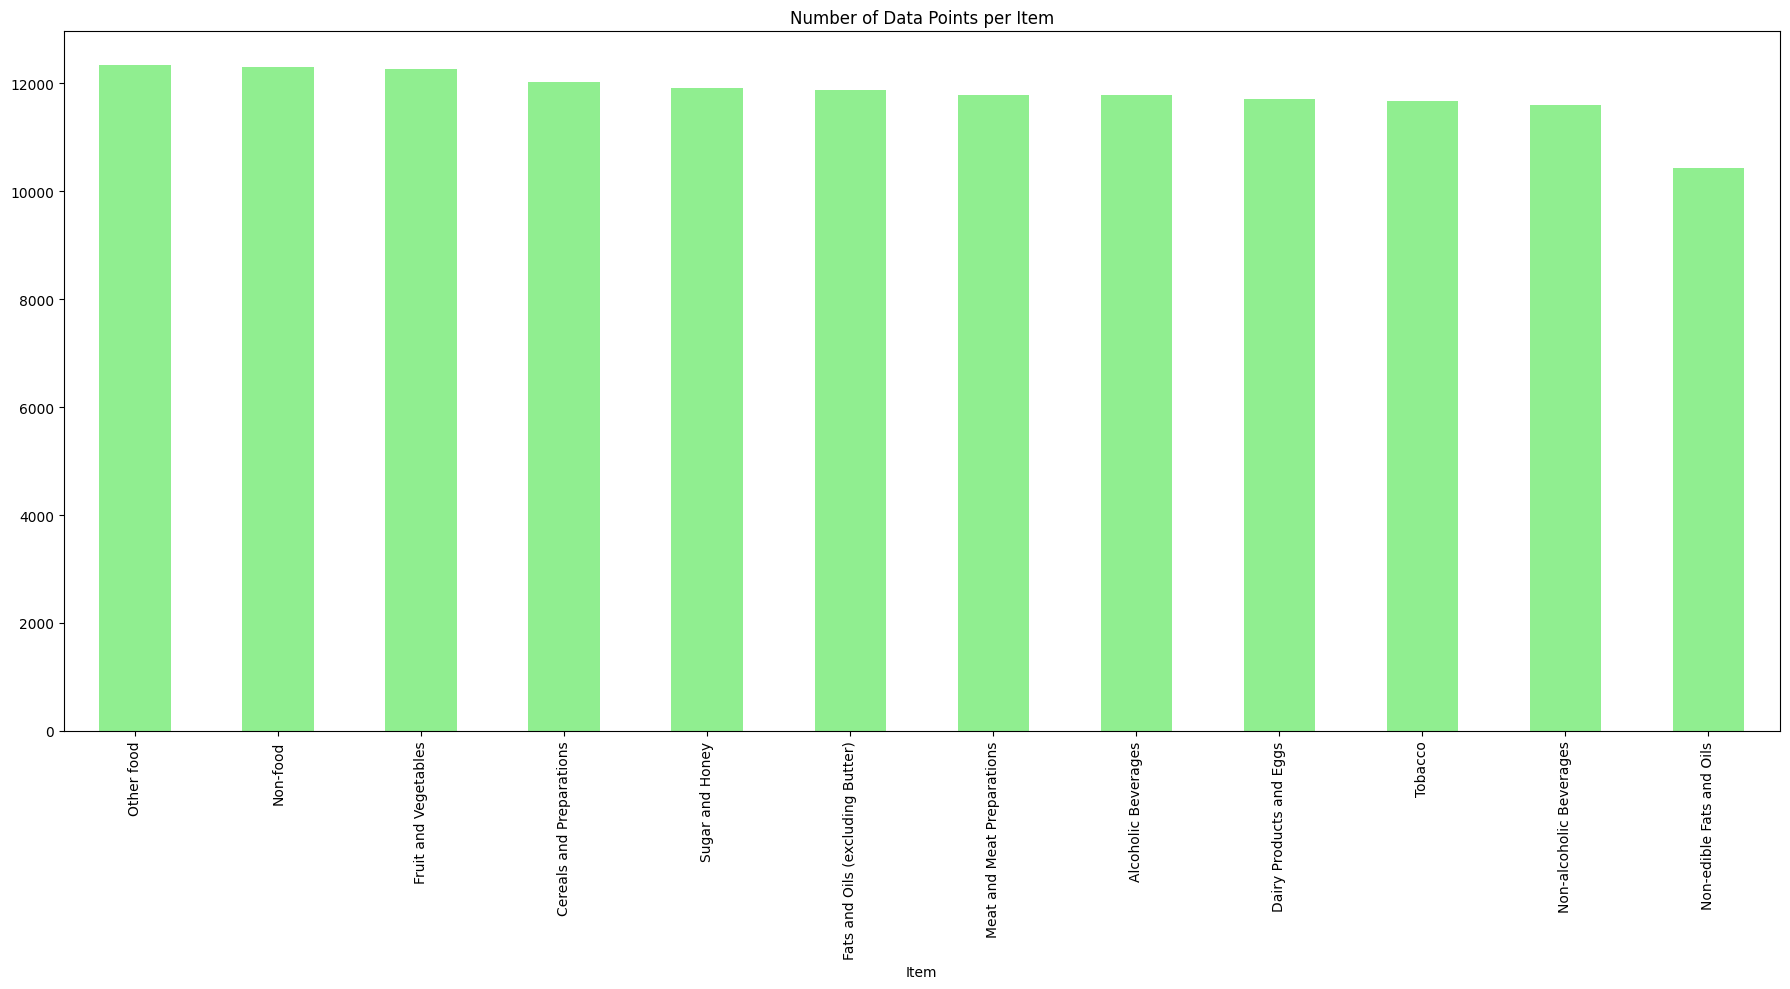

In [339]:


# Count the number of data points for each country
country_data_count = df9['Area'].value_counts()

# Count the number of data points for each item
item_data_count = df9['Item'].value_counts()



# Plot for each item
item_data_count.plot(kind='bar', color='lightgreen',title = 'Number of Data Points per Item',figsize=(18, 10))


# Show the plots
plt.tight_layout()
plt.show()


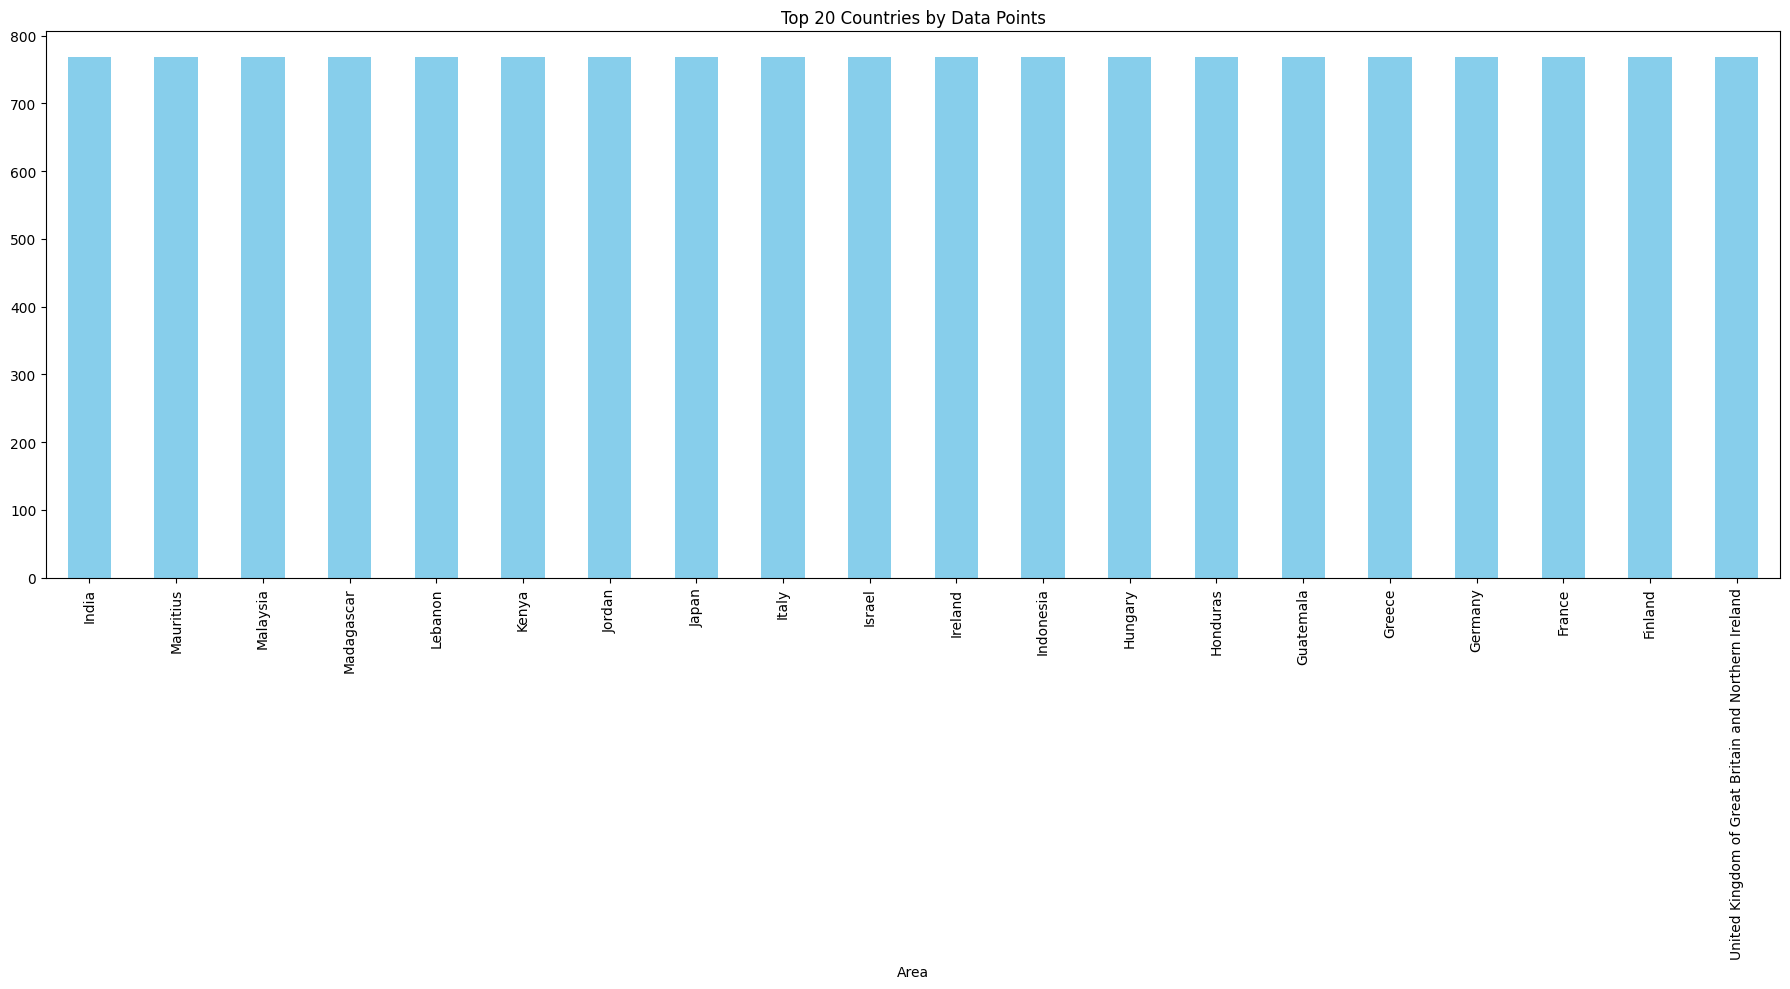

In [340]:
# Create a figure with two subplots for improved readability


# Top 20 countries visualization
top_countries = country_data_count.head(20)
top_countries.plot(kind='bar', color='skyblue',title= 'Top 20 Countries by Data Points', figsize=(18, 10))





# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [341]:
df9 = df9.groupby(['Area Code (M49)', 'Year', 'Element','Item']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df9.head()

,Area Code (M49),Year,Element,Item,Value
0,4,1991,Export Value,Fruit and Vegetables,51858.0
1,4,1991,Export Value,Non-food,45055.0
2,4,1991,Export Value,Other food,1330.0
3,4,1991,Export Value,Sugar and Honey,0.0
4,4,1991,Export Value,Tobacco,0.0


In [ ]:
if

In [342]:
df9 = df9.loc[df9['Item']!= 'Meat and Meat Preparations']
df9 = df9.loc[df9['Item']!= 'Dairy Products and Eggs']


In [343]:
df9.head()

,Area Code (M49),Year,Element,Item,Value
0,4,1991,Export Value,Fruit and Vegetables,51858.0
1,4,1991,Export Value,Non-food,45055.0
2,4,1991,Export Value,Other food,1330.0
3,4,1991,Export Value,Sugar and Honey,0.0
4,4,1991,Export Value,Tobacco,0.0


In [344]:
df9.drop(columns=['Item'],inplace=True)

In [345]:
columns = {"Area Code (M49)" : "Area"



            }
df9.rename(columns=columns,inplace=True)

In [346]:
# Pivot the data to have separate columns for each item type
df9 = df9.pivot_table(index=['Area', 'Year'], columns='Element', values='Value', aggfunc='first')

# Reset index to flatten the DataFrame
df9.reset_index(inplace=True)

# Show the new DataFrame
df9.head()

Element,Area,Year,Export Value,Import Value
0,4,1991,51858.0,0.0
1,4,1992,19062.0,0.0
2,4,1993,21324.0,0.0
3,4,1994,26907.0,0.0
4,4,1995,24240.0,0.0


In [347]:
columns = {
           "Export Value" : "Export_Value",
           "Import Value" : "Import_Value"
           




            }
df9.rename(columns=columns,inplace=True)

In [348]:
nan_counts = df9.isna().sum()

print(nan_counts)

Element
Area             0
Year             0
Export_Value    25
Import_Value     0
dtype: int64


In [349]:

nan_rows = df9[df9.isna().any(axis=1)]

# Print the areas, years, and columns that have NaN values
for index, row in nan_rows.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, NaN Columns: {nan_columns}')

Area: 520.0, Year: 1991.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 1992.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 1993.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 1994.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 1995.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 1996.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 1997.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 1998.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 1999.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 2000.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 2001.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 2002.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 2003.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 2004.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 2005.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 2006.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 2007.0, NaN Columns: ['Export_Value']
Area: 520.0, Year: 2008.0, NaN 

In [350]:
zero_rows = df9[(df9['Export_Value'] == 0) ]


# Print the areas, years, and columns that have zero values
for index, row in zero_rows.iterrows():
    zero_columns = row[row == 0].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, zero Columns: {zero_columns}')

Area: 4.0, Year: 2011.0, zero Columns: ['Export_Value']
Area: 4.0, Year: 2012.0, zero Columns: ['Export_Value']
Area: 4.0, Year: 2013.0, zero Columns: ['Export_Value']
Area: 8.0, Year: 1995.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 1991.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 1992.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 1993.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 1994.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 1995.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 1996.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 1997.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 1998.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 1999.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 2000.0, zero Columns: ['Export_Value']
Area: 24.0, Year: 2001.0, zero Columns: ['Export_Value']
Area: 28.0, Year: 1995.0, zero Columns: ['Export_Value']
Area: 48.0, Year: 2001.0, zero Columns: ['Export_Value']
Area: 50.0, Year: 2001.0, zero Colu

In [351]:
zero_rows = df9[(df9['Import_Value'] == 0) ]


# Print the areas, years, and columns that have zero values
for index, row in zero_rows.iterrows():
    zero_columns = row[row == 0].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, zero Columns: {zero_columns}')

Area: 4.0, Year: 1991.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 1992.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 1993.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 1994.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 1995.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 1996.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 1997.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 1998.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 1999.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 2000.0, zero Columns: ['Import_Value']
Area: 4.0, Year: 2001.0, zero Columns: ['Import_Value']
Area: 364.0, Year: 1991.0, zero Columns: ['Export_Value', 'Import_Value']
Area: 364.0, Year: 1992.0, zero Columns: ['Export_Value', 'Import_Value']
Area: 364.0, Year: 1993.0, zero Columns: ['Export_Value', 'Import_Value']
Area: 364.0, Year: 1994.0, zero Columns: ['Export_Value', 'Import_Value']
Area: 364.0, Year: 1995.0, zero Columns: ['Export_Value', 'Import_Value']
Area: 364.0, Y

In [352]:
df9 = df9.dropna(subset=['Export_Value'])

In [353]:
nan_counts = df9.isna().sum()

print(nan_counts)

Element
Area            0
Year            0
Export_Value    0
Import_Value    0
dtype: int64


In [354]:
df9.shape

(6180, 4)

# df10

In [355]:
df10.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [356]:
df10_uniq = Datadiscribe(df10)

df10_uniq.uniq()

{'Domain Code': array(['FDI'], dtype=object),
 'Domain': array(['Foreign Direct Investment (FDI)'], dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  24, 660,  28,  32,  51, 533,  36,  40,  31,  44,
         48,  50,  52, 112,  56,  84, 204,  60,  64,  68,  70,  72,  76,
         92,  96, 100, 854, 108, 132, 116, 120, 124, 136, 140, 148, 152,
        344, 446, 156, 158, 170, 174, 178, 184, 188, 384, 191, 531, 196,
        203, 408, 180, 208, 262, 212, 214, 218, 818, 222, 226, 232, 233,
        748, 231, 242, 246, 250, 254, 258, 266, 270, 268, 276, 288, 300,
        308, 312, 320, 324, 624, 328, 332, 340, 348, 352, 356, 360, 364,
        368, 372, 376, 380, 388, 392, 400, 398, 404, 296, 414, 417, 418,
        428, 422, 426, 430, 434, 440, 442, 450, 454, 458, 462, 466, 470,
        584, 478, 480, 175, 484, 583, 496, 499, 500, 504, 508, 104, 516,
        524, 528, 530, 540, 554, 558, 562, 566, 807, 578, 512, 586, 585,
        275, 591, 598, 600, 604, 608, 616, 620, 634, 410, 498, 

In [357]:

df10 = df10.groupby(['Area Code (M49)', 'Year', 'Item']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df10.head()

,Area Code (M49),Year,Item,Value
0,4,2000,Total FDI inflows,0.17
1,4,2001,Total FDI inflows,0.68
2,4,2002,Total FDI inflows,50.00
3,4,2003,Total FDI inflows,57.80
4,4,2003,Total FDI outflows,1.00


In [358]:
columns = {"Area Code (M49)" : "Area"



            }
df10.rename(columns=columns,inplace=True)

In [359]:
# Pivot the data to have separate columns for each item type
df10 = df10.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', aggfunc='first')

# Reset index to flatten the DataFrame
df10.reset_index(inplace=True)

# Show the new DataFrame
df10.head()


Item,Area,Year,"FDI inflows to Agriculture, Forestry and Fishing","FDI inflows to Food, Beverages and Tobacco","FDI outflows to Agriculture, Forestry and Fishing","FDI outflows to Food, Beverages and Tobacco",Total FDI inflows,Total FDI outflows
0,4,2000,NaN,NaN,NaN,NaN,0.17,NaN
1,4,2001,NaN,NaN,NaN,NaN,0.68,NaN
2,4,2002,NaN,NaN,NaN,NaN,50.00,NaN
3,4,2003,NaN,NaN,NaN,NaN,57.80,1.0
4,4,2004,NaN,NaN,NaN,NaN,186.90,-0.7


In [360]:
nan_counts = df10.isna().sum()

print(nan_counts)

Item
Area                                                    0
Year                                                    0
FDI inflows to Agriculture, Forestry and Fishing     2964
FDI inflows to Food, Beverages and Tobacco           3475
FDI outflows to Agriculture, Forestry and Fishing    3867
FDI outflows to Food, Beverages and Tobacco          3883
Total FDI inflows                                      14
Total FDI outflows                                   1001
dtype: int64


In [361]:
columns = {"Total FDI inflows" : "FDI_inflows",
           "Total FDI outflows" : "FDI_outflows"



            }
df10.rename(columns=columns,inplace=True)

In [362]:
nan_counts = df10.isna().sum()

print(nan_counts)

Item
Area                                                    0
Year                                                    0
FDI inflows to Agriculture, Forestry and Fishing     2964
FDI inflows to Food, Beverages and Tobacco           3475
FDI outflows to Agriculture, Forestry and Fishing    3867
FDI outflows to Food, Beverages and Tobacco          3883
FDI_inflows                                            14
FDI_outflows                                         1001
dtype: int64


In [363]:
df10.drop(columns=['FDI inflows to Agriculture, Forestry and Fishing'],inplace=True)

In [364]:
df10.drop(columns=['FDI outflows to Agriculture, Forestry and Fishing'],inplace=True)

# df11

In [365]:
df11.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [366]:
df11_uniq = Datadiscribe(df11)

df11_uniq.uniq()

{'Domain Code': array(['ET'], dtype=object),
 'Domain': array(['Temperature change on land'], dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  16,  20,  24, 660,  10,  28,  32,  51, 533,  36,
         40,  31,  44,  48,  50,  52, 112,  56,  84, 204,  64,  68,  70,
         72,  76,  92,  96, 100, 854, 108, 132, 116, 120, 124, 136, 140,
        148, 830, 152, 159, 344, 446, 156, 158, 162, 166, 170, 174, 178,
        184, 188, 384, 191, 192, 196, 203, 408, 180, 208, 262, 212, 214,
        218, 818, 222, 226, 232, 233, 748, 231, 238, 234, 242, 246, 250,
        254, 258, 260, 266, 270, 268, 276, 288, 292, 300, 304, 308, 312,
        320, 324, 624, 328, 332, 336, 340, 348, 352, 356, 360, 364, 368,
        372, 833, 376, 380, 388, 392, 400, 398, 404, 296, 414, 417, 418,
        428, 422, 426, 430, 434, 438, 440, 442, 450, 454, 458, 462, 466,
        470, 584, 474, 478, 480, 175, 484, 583, 488, 492, 496, 499, 500,
        504, 508, 104, 516, 520, 524, 528, 530, 540, 554, 558, 562, 5

In [367]:
df11 = df11.loc[df11['Months'] == 'Meteorological year']

In [368]:

df11 = df11.groupby(['Area Code (M49)', 'Year', 'Element']).agg({'Value': 'mean'}).reset_index()

# Display the transformed data
df11.head()

,Area Code (M49),Year,Element,Value
0,4,2000,Standard Deviation,0.550
1,4,2000,Temperature change,0.993
2,4,2001,Standard Deviation,0.550
3,4,2001,Temperature change,1.311
4,4,2002,Standard Deviation,0.550


In [369]:
columns = {"Area Code (M49)" : "Area"



            }
df11.rename(columns=columns,inplace=True)

In [370]:
# Pivot the data to have separate columns for each item type
df11 = df11.pivot_table(index=['Area', 'Year'], columns='Element', values='Value', aggfunc='first')

# Reset index to flatten the DataFrame
df11.reset_index(inplace=True)

# Show the new DataFrame
df11.head()

Element,Area,Year,Standard Deviation,Temperature change
0,4,2000,0.55,0.993
1,4,2001,0.55,1.311
2,4,2002,0.55,1.365
3,4,2003,0.55,0.587
4,4,2004,0.55,1.373


In [371]:
columns = {"Standard Deviation" : "Standard_Deviation",
           "Temperature change" : "Temperature_change"




            }
df11.rename(columns=columns,inplace=True)

In [372]:

# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with NaN values
nan_rows = df11[df11.isna().any(axis=1)]

# Print the areas, years, and columns that have NaN values
for index, row in nan_rows.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, NaN Columns: {nan_columns}')

Area: 31.0, Year: 2000.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2001.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2002.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2003.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2004.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2005.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2006.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2007.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2008.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2009.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2010.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2011.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2012.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2013.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2014.0, NaN Columns: ['Standard_Deviation']
Area: 31.0, Year: 2015.0, NaN Columns: ['Standard_Deviation']
Area: 31

In [373]:
nan_counts = df11.isna().sum()

print(nan_counts)

Element
Area                    0
Year                    0
Standard_Deviation    795
Temperature_change      0
dtype: int64


In [374]:
df11.head(11)

Element,Area,Year,Standard_Deviation,Temperature_change
0,4,2000,0.55,0.993
1,4,2001,0.55,1.311
2,4,2002,0.55,1.365
3,4,2003,0.55,0.587
4,4,2004,0.55,1.373
5,4,2005,0.55,0.401
6,4,2006,0.55,1.720
7,4,2007,0.55,0.675
8,4,2008,0.55,0.704
9,4,2009,0.55,0.895


In [375]:
nan_counts = df11.isna().sum()

print(nan_counts)

Element
Area                    0
Year                    0
Standard_Deviation    795
Temperature_change      0
dtype: int64


# df12

In [376]:
df12.head(12)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN
5,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1985,1985,1000 ha,65286.0,A,Official figure,NaN
6,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1986,1986,1000 ha,65286.0,A,Official figure,NaN
7,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1987,1987,1000 ha,65286.0,A,Official figure,NaN
8,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1988,1988,1000 ha,65286.0,A,Official figure,NaN
9,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1989,1989,1000 ha,65286.0,A,Official figure,NaN


In [377]:
df12_uniq = Datadiscribe(df12)

df12_uniq.uniq()

{'Domain Code': array(['RL'], dtype=object),
 'Domain': array(['Land Use'], dtype=object),
 'Area Code (M49)': array([  4,   8,  12,  16,  20,  24, 660,  28,  32,  51, 533,  36,  40,
         31,  44,  48,  50,  52, 112,  56,  58,  84, 204,  60,  64,  68,
        535,  70,  72,  76,  92,  96, 100, 854, 108, 132, 116, 120, 124,
        136, 140, 148, 830, 152, 159, 344, 446, 156, 158, 170, 174, 178,
        184, 188, 384, 191, 192, 531, 196, 203, 200, 408, 180, 208, 262,
        212, 214, 218, 818, 222, 226, 232, 233, 748, 231, 230, 238, 234,
        242, 246, 250, 254, 258, 266, 270, 268, 276, 288, 292, 300, 304,
        308, 312, 316, 320, 324, 624, 328, 332, 336, 340, 348, 352, 356,
        360, 364, 368, 372, 833, 376, 380, 388, 392, 400, 398, 404, 296,
        414, 417, 418, 428, 422, 426, 430, 434, 438, 440, 442, 450, 454,
        458, 462, 466, 470, 584, 474, 478, 480, 175, 484, 583, 492, 496,
        499, 500, 504, 508, 104, 516, 520, 524, 528, 530, 540, 554, 558,
        562, 5

In [378]:

df12 = df12.groupby(['Area Code (M49)', 'Year','Item']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df12.head()

,Area Code (M49),Year,Item,Value
0,4,1980,Agricultural land,38049.0
1,4,1980,Agriculture,38049.0
2,4,1980,Arable land,7910.0
3,4,1980,Country area,65286.0
4,4,1980,Cropland,8049.0


In [379]:
df12 = df12.loc[df12['Item']!= 'Country area']
df12 = df12.loc[df12['Item']!= 'Land area']


df12 = df12.loc[df12['Item']!= 'Temporary meadows and pastures']
df12 = df12.loc[df12['Item']!= 'Perm. Meadows & Pastures - Nat. Growing']
df12 = df12.loc[df12['Item']!= 'Permanent Meadows and Pastures']
df12 = df12.loc[df12['Item']!= 'Perm. Meadows & Pastures - Cultivated']
df12 = df12.loc[df12['Item']!= 'Perm. meadows & pastures area actually irrig.']


In [380]:

df12 = df12.groupby(['Area Code (M49)', 'Year']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df12.head()

,Area Code (M49),Year,Value
0,4,1980,124701.0
1,4,1981,124732.0
2,4,1982,124751.0
3,4,1983,124766.0
4,4,1984,124797.0


In [381]:
columns = {"Value" : "land_use",
           'Area Code (M49)' : 'Area'



            }
df12.rename(columns=columns,inplace=True)

In [382]:
df12.head()

,Area,Year,land_use
0,4,1980,124701.0
1,4,1981,124732.0
2,4,1982,124751.0
3,4,1983,124766.0
4,4,1984,124797.0


In [383]:
nan_counts = df12.isna().sum()

print(nan_counts)

Area        0
Year        0
land_use    0
dtype: int64


In [384]:

# Assuming 'pivot_data' is your DataFrame with 'Area' and 'Year' as index and item columns
# Check for rows with zero values

zero_rows = df12[(df12['land_use'] == 0) ]


# Print the areas, years, and columns that have zero values
for index, row in zero_rows.iterrows():
    zero_columns = row[row == 0].index.tolist()
    area = row['Area']
    year = row['Year']
    print(f'Area: {area}, Year: {year}, zero Columns: {zero_columns}')

# df13

In [385]:
df13.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [386]:
df13_uniq = Datadiscribe(df13)

df13_uniq.uniq()

{'Domain Code': array(['RP'], dtype=object),
 'Domain': array(['Pesticides Use'], dtype=object),
 'Area Code (M49)': array([  8,  12,  20,  24, 660,  28,  32,  51, 533,  36,  40,  31,  44,
         48,  50,  52, 112,  56,  84, 204,  60,  64,  68,  70,  72,  76,
         92,  96, 100, 854, 108, 132, 116, 120, 124, 136, 140, 148, 152,
        159, 344, 446, 156, 158, 170, 174, 178, 184, 188, 384, 191, 192,
        196, 203, 180, 208, 262, 214, 218, 818, 222, 226, 232, 233, 748,
        231, 238, 234, 242, 246, 250, 258, 266, 270, 268, 276, 288, 300,
        304, 308, 316, 320, 324, 624, 328, 332, 336, 340, 348, 352, 356,
        360, 364, 368, 372, 376, 380, 388, 392, 400, 398, 404, 296, 414,
        417, 418, 428, 422, 426, 430, 434, 440, 442, 450, 454, 458, 462,
        466, 470, 478, 480, 175, 484, 583, 496, 499, 500, 504, 508, 104,
        516, 520, 524, 528, 530, 540, 554, 558, 562, 566, 570, 574, 807,
        580, 578, 512, 586, 585, 275, 591, 598, 600, 604, 608, 612, 616,
        

In [387]:

df13 = df13.groupby(['Area Code (M49)', 'Year', 'Element','Unit']).agg({'Value': 'sum'}).reset_index()

# Display the transformed data
df13.head()

,Area Code (M49),Year,Element,Unit,Value
0,8,2000,Agricultural Use,t,607.90
1,8,2000,Use per area of cropland,kg/ha,0.44
2,8,2000,Use per value of agricultural production,g/Int$,0.23
3,8,2001,Agricultural Use,t,629.09
4,8,2001,Use per area of cropland,kg/ha,0.46


In [388]:
df13.drop(columns=['Unit'],inplace=True)

In [389]:

columns = {"Area Code (M49)" : "Area"



            }
df13.rename(columns=columns,inplace=True)

In [390]:
# Pivot the data to have separate columns for each item type
df13 = df13.pivot_table(index=['Area', 'Year'], columns='Element', values='Value', aggfunc='first')

# Reset index to flatten the DataFrame
df13.reset_index(inplace=True)

# Show the new DataFrame
df13.head()


Element,Area,Year,Agricultural Use,Use per area of cropland,Use per value of agricultural production
0,8,2000,607.90,0.44,0.23
1,8,2001,629.09,0.46,0.23
2,8,2002,650.27,0.47,0.24
3,8,2003,671.44,0.49,0.24
4,8,2004,692.62,0.51,0.23


In [391]:

columns = {"Agricultural Use" : "Pesticides_Agricultural",
           "Use per area of cropland" : "Pesticides_cropland",
           "Use per value of agricultural production" : "Pesticides_production"


            }
df13.rename(columns=columns,inplace=True)

In [392]:
nan_counts = df13.isna().sum()

print(nan_counts)

Element
Area                         0
Year                         0
Pesticides_Agricultural      0
Pesticides_cropland        561
Pesticides_production      792
dtype: int64


In [393]:
df13.head(5)

Element,Area,Year,Pesticides_Agricultural,Pesticides_cropland,Pesticides_production
0,8,2000,607.90,0.44,0.23
1,8,2001,629.09,0.46,0.23
2,8,2002,650.27,0.47,0.24
3,8,2003,671.44,0.49,0.24
4,8,2004,692.62,0.51,0.23


In [394]:

from functools import reduce



dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13]

# Merge all data frames on 'Area' and 'Year'.
# Use an outer join to ensure that all data is kept.
df = reduce(lambda left,right: pd.merge(left, right, on=['Area', 'Year'], how='outer'), dfs)


In [395]:
df.head(5)

,Area,Year,Consumer_Prices,Food_inflation,yield,emission,employ,Exchange_rates,Fertilizers_use,Export Quantity,...,"FDI inflows to Food, Beverages and Tobacco","FDI outflows to Food, Beverages and Tobacco",FDI_inflows,FDI_outflows,Standard_Deviation,Temperature_change,land_use,Pesticides_Agricultural,Pesticides_cropland,Pesticides_production
0,4,1980,NaN,NaN,NaN,NaN,NaN,44.129167,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,124701.0,NaN,NaN,NaN
1,4,1981,NaN,NaN,NaN,NaN,NaN,49.479902,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,124732.0,NaN,NaN,NaN
2,4,1982,NaN,NaN,NaN,NaN,NaN,50.599608,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,124751.0,NaN,NaN,NaN
3,4,1983,NaN,NaN,NaN,NaN,NaN,50.599608,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,124766.0,NaN,NaN,NaN
4,4,1984,NaN,NaN,NaN,NaN,NaN,50.599606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,124797.0,NaN,NaN,NaN


In [396]:
df.shape

(10381, 32)

In [397]:
df = df.dropna(subset=['Export_Value'])

In [398]:
df.shape

(6210, 32)

In [399]:
df = df.reset_index(drop=True)

In [400]:
df['Target_Export_Value'] = df.groupby('Area')['Export_Value'].shift(-3)

In [401]:
df = df.dropna(subset=['Target_Export_Value'])

In [402]:
df = df.dropna(subset=['Export_Value'])

In [403]:
df.shape

(5607, 33)

In [404]:
columns = {"Export Quantity" : "Export_Quantity",
           "Import Quantity" : "Import_Quantity"

           




            }
df.rename(columns=columns,inplace=True)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5607 entries, 0 to 6206
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Area                                         5607 non-null   int64  
 1   Year                                         5607 non-null   int64  
 2   Consumer_Prices                              3669 non-null   float64
 3   Food_inflation                               3669 non-null   float64
 4   yield                                        3885 non-null   float64
 5   emission                                     3905 non-null   float64
 6   employ                                       2993 non-null   float64
 7   Exchange_rates                               5241 non-null   float64
 8   Fertilizers_use                              1818 non-null   float64
 9   Export_Quantity                              1818 non-null   float64
 10  Food 

In [406]:
df = df.reset_index(drop=True)

In [407]:
df.head(10)

,Area,Year,Consumer_Prices,Food_inflation,yield,emission,employ,Exchange_rates,Fertilizers_use,Export_Quantity,...,"FDI outflows to Food, Beverages and Tobacco",FDI_inflows,FDI_outflows,Standard_Deviation,Temperature_change,land_use,Pesticides_Agricultural,Pesticides_cropland,Pesticides_production,Target_Export_Value
0,4,1991,NaN,NaN,NaN,NaN,NaN,50.599605,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,125120.0,NaN,NaN,NaN,26907.0
1,4,1992,NaN,NaN,NaN,NaN,NaN,50.599605,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,125300.0,NaN,NaN,NaN,24240.0
2,4,1993,NaN,NaN,NaN,NaN,NaN,50.599605,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124916.0,NaN,NaN,NaN,39173.0
3,4,1994,NaN,NaN,NaN,NaN,NaN,425.099934,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124432.0,NaN,NaN,NaN,44556.0
4,4,1995,NaN,NaN,NaN,NaN,NaN,833.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124232.0,NaN,NaN,NaN,44243.0
5,4,1996,NaN,NaN,NaN,NaN,NaN,2500.022500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124208.0,NaN,NaN,NaN,38255.0
6,4,1997,NaN,NaN,NaN,NaN,NaN,3000.030000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124383.0,NaN,NaN,NaN,31080.0
7,4,1998,NaN,NaN,NaN,NaN,NaN,3000.052503,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124675.0,NaN,NaN,NaN,27110.0
8,4,1999,NaN,NaN,NaN,NaN,NaN,46619.531080,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124259.0,NaN,NaN,NaN,31153.0
9,4,2000,319.558176,153.368307,661957.0,21.5527,87625.296,47357.574730,NaN,NaN,...,NaN,0.17,NaN,0.55,0.993,124379.0,NaN,NaN,NaN,31153.0


In [408]:
nan_counts = df.isna().sum()

print(nan_counts)

Area                                              0
Year                                              0
Consumer_Prices                                1938
Food_inflation                                 1938
yield                                          1722
emission                                       1702
employ                                         2614
Exchange_rates                                  366
Fertilizers_use                                3789
Export_Quantity                                3789
Food                                           3789
Import_Quantity                                3789
Losses                                         3789
Other uses (non-food)                          3800
protein_supply                                 1912
Cereal_import_dependency                       1986
food_production_variability                    1734
food_supply_variability                        1986
land_equipped_irrigation                       2038
food_imports

In [409]:
df.to_csv('Faosdat_kiana10.csv', index=False)

In [410]:
df_df = df.copy()

In [411]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create a Gaussian imputer function
def gaussian_impute(data):
    for column in data.columns:
        if data[column].isna().sum() > 0:  # Check if there are NaNs
            # Calculate mean and standard deviation for the column
            mean = data[column].mean()
            std = data[column].std()
            
            # Generate random numbers from a normal distribution to fill NaNs
            random_normal_data = np.random.normal(loc=mean, scale=std, size=data[column].isna().sum())
            
            # Place these random numbers into the positions of NaNs
            nan_indices = data[column].index[data[column].isnull()]
            data.loc[nan_indices, column] = random_normal_data
    
    return data

# Apply Gaussian imputation
df_merge = gaussian_impute(df)




In [412]:


# Create the KNN imputer instance
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the DataFrame
imputed_data = imputer.fit_transform(df)

# Create a new DataFrame with the imputed data, maintaining the same column structure
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

# Replace only the NaN values in the original DataFrame with the imputed values
filled_data = df.where(~df.isna(), imputed_df)

# Show the first few rows of the updated DataFrame
filled_data.head()



,Area,Year,Consumer_Prices,Food_inflation,yield,emission,employ,Exchange_rates,Fertilizers_use,Export_Quantity,...,"FDI outflows to Food, Beverages and Tobacco",FDI_inflows,FDI_outflows,Standard_Deviation,Temperature_change,land_use,Pesticides_Agricultural,Pesticides_cropland,Pesticides_production,Target_Export_Value
0,4,1991,-9.479729e+07,-2662.361583,7.482291e+05,16113.593460,1.719619e+06,50.599605,-4.485828e+06,18677.470208,...,155.432681,-15451.140537,41570.651587,0.474715,1.502982,125120.0,160683.904197,-2.353544,0.656558,26907.0
1,4,1992,1.846871e+08,-35252.395657,1.359143e+06,21567.040204,1.544036e+06,50.599605,5.857832e+06,2861.325816,...,9656.869969,36395.449332,-7956.747588,0.340699,1.761433,125300.0,-39617.371091,8.288585,-0.228431,24240.0
2,4,1993,-7.008394e+07,4919.234797,1.602056e+06,-27559.959217,2.631055e+06,50.599605,-7.408327e+06,44070.813128,...,2454.357183,-49094.418130,44875.878191,0.130966,1.347082,124916.0,-78096.320293,0.905740,-0.569225,39173.0
3,4,1994,-7.385744e+07,4852.310394,3.647361e+05,36163.225553,5.386566e+05,425.099934,1.386154e+07,51191.242724,...,-1310.468139,19151.529292,43733.448309,0.250377,1.724969,124432.0,83897.808646,10.437819,2.303340,44556.0
4,4,1995,1.496209e+08,-17550.233694,1.447993e+06,4867.804193,-1.252955e+06,833.333333,-5.991539e+06,43649.376051,...,3061.007911,52653.618569,-2698.319406,0.188776,0.451613,124232.0,-185928.317498,8.495646,0.117425,44243.0


In [413]:
df = filled_data.copy()

In [414]:
df.to_csv('Faosdat_kiana10.csv', index=False)

In [415]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer



# Splitting data into features and target
#X = df.drop(columns=['Target_Export_Value'])
#y = df['Target_Export_Value']

# Splitting the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Regressor
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#rf_model.fit(X_train, y_train)

# Evaluating the model
#y_pred = rf_model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)

# Extracting feature importances
#feature_importances = pd.DataFrame({
    #'Feature': X.columns,
    #'Importance': rf_model.feature_importances_
#}).sort_values(by='Importance', ascending=False)

#mse, feature_importances.head(10)  # Display MSE and the top 10 most important features


In [416]:
nan_counts = df.isna().sum()

print(nan_counts)

Area                                           0
Year                                           0
Consumer_Prices                                0
Food_inflation                                 0
yield                                          0
emission                                       0
employ                                         0
Exchange_rates                                 0
Fertilizers_use                                0
Export_Quantity                                0
Food                                           0
Import_Quantity                                0
Losses                                         0
Other uses (non-food)                          0
protein_supply                                 0
Cereal_import_dependency                       0
food_production_variability                    0
food_supply_variability                        0
land_equipped_irrigation                       0
food_imports_merchandise_exports               0
Export_Value        

In [417]:
df .describe()

,Area,Year,Consumer_Prices,Food_inflation,yield,emission,employ,Exchange_rates,Fertilizers_use,Export_Quantity,...,"FDI outflows to Food, Beverages and Tobacco",FDI_inflows,FDI_outflows,Standard_Deviation,Temperature_change,land_use,Pesticides_Agricultural,Pesticides_cropland,Pesticides_production,Target_Export_Value
count,5607.000000,5607.000000,5.607000e+03,5.607000e+03,5.607000e+03,5607.000000,5.607000e+03,5.607000e+03,5.607000e+03,5607.000000,...,5607.000000,5607.000000,5607.000000,5607.000000,5607.000000,5.607000e+03,5.607000e+03,5607.000000,5607.000000,5.607000e+03
mean,423.457107,2005.149813,4.418489e+05,4.662933e+02,9.690293e+05,4270.131455,3.292355e+05,1.135002e+06,1.915272e+06,6533.689997,...,351.052547,7210.612598,9347.593409,0.347902,1.014717,1.019195e+05,3.306571e+04,3.211148,0.947186,3.109802e+05
std,253.200620,8.344271,9.110500e+07,2.934911e+04,5.015215e+05,17597.707325,1.815560e+06,9.244668e+07,6.369704e+06,18772.729992,...,4661.985440,24281.647940,33044.740927,0.140775,0.505958,2.727289e+05,1.077473e+05,4.866905,1.103040,1.281472e+06
min,4.000000,1991.000000,-3.356014e+08,-9.293628e+04,-8.060187e+05,-53075.652763,-6.375295e+06,-2.231782e+08,-1.856438e+07,-61715.148144,...,-90599.551520,-73371.950247,-157406.000000,-0.167812,-1.021859,-3.743733e+05,-3.043545e+05,-12.338741,-3.054450,0.000000e+00
25%,204.000000,1998.000000,4.863535e+02,2.086401e+00,5.916725e+05,0.093250,1.014750e+03,2.000000e+00,-1.176841e+05,0.000000,...,-2367.503030,56.296029,-0.397807,0.255000,0.668000,2.655450e+03,2.114100e+02,0.280000,0.220000,1.500000e+02
50%,414.000000,2005.000000,1.002730e+03,4.994571e+01,9.449610e+05,121.924400,3.417855e+04,1.332380e+01,5.170000e+05,2351.848921,...,104.951311,871.513000,316.800000,0.317000,0.978000,1.584730e+04,3.627560e+03,1.720000,0.700000,4.348000e+03
75%,643.000000,2012.000000,1.249030e+03,1.616679e+02,1.316337e+06,5315.140637,5.294192e+05,3.102504e+02,4.869393e+06,15530.430421,...,3157.572630,9507.618772,17579.814060,0.429071,1.321000,7.385300e+04,3.867785e+04,5.305280,1.473563,6.597301e+04
max,894.000000,2021.000000,5.548766e+09,1.721899e+06,2.579116e+06,241734.333900,3.013184e+07,6.723052e+09,6.166760e+07,189081.000000,...,25515.730790,467625.000000,396569.000000,0.987000,2.915000,2.336953e+06,1.224184e+06,37.610000,7.430000,1.957636e+07


In [418]:
df.columns

Index(['Area', 'Year', 'Consumer_Prices', 'Food_inflation', 'yield',
       'emission', 'employ', 'Exchange_rates', 'Fertilizers_use',
       'Export_Quantity', 'Food', 'Import_Quantity', 'Losses',
       'Other uses (non-food)', 'protein_supply', 'Cereal_import_dependency',
       'food_production_variability', 'food_supply_variability',
       'land_equipped_irrigation', 'food_imports_merchandise_exports',
       'Export_Value', 'Import_Value',
       'FDI inflows to Food, Beverages and Tobacco',
       'FDI outflows to Food, Beverages and Tobacco', 'FDI_inflows',
       'FDI_outflows', 'Standard_Deviation', 'Temperature_change', 'land_use',
       'Pesticides_Agricultural', 'Pesticides_cropland',
       'Pesticides_production', 'Target_Export_Value'],
      dtype='object')

In [419]:
df_exrots = df[['Export_Value','Target_Export_Value']]

In [420]:
df_exrots.head()

,Export_Value,Target_Export_Value
0,51858.0,26907.0
1,19062.0,24240.0
2,21324.0,39173.0
3,26907.0,44556.0
4,24240.0,44243.0


In [421]:
df.to_csv('Faosdat_kiana2.csv', index=False)


In [422]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the features and the target
X = df.drop('Target_Export_Value', axis=1)
y = df['Target_Export_Value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest and Gradient Boosting models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train both models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Get feature importance
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Creating a DataFrame to visualize feature importance
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest Importance': rf_importances,
    'Gradient Boosting Importance': gb_importances
}).sort_values(by='Random Forest Importance', ascending=False)

feature_importance_df


,Feature,Random Forest Importance,Gradient Boosting Importance
20,Export_Value,0.939447,0.958176
9,Export_Quantity,0.016437,0.011848
4,yield,0.012339,0.002389
15,Cereal_import_dependency,0.011323,0.015758
28,land_use,0.003205,0.001685
2,Consumer_Prices,0.001524,0.000931
21,Import_Value,0.001052,0.000316
22,"FDI inflows to Food, Beverages and Tobacco",0.001041,0.001676
10,Food,0.000945,0.001069
18,land_equipped_irrigation,0.000931,0.000738


In [423]:
# We'll choose features that contribute significantly to each model
# For demonstration, we'll select features that contribute at least 1% of importance from either model

important_features = feature_importance_df.loc[
    (feature_importance_df['Random Forest Importance'] > 0.01) | 
    (feature_importance_df['Gradient Boosting Importance'] > 0.01)
]

# Filter the training and testing data to include only the selected important features
X_train_reduced = X_train[important_features['Feature']]
X_test_reduced = X_test[important_features['Feature']]

# Retrain the models on the reduced feature set
rf_model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model_reduced = GradientBoostingRegressor(n_estimators=100, random_state=42)

rf_model_reduced.fit(X_train_reduced, y_train)
gb_model_reduced.fit(X_train_reduced, y_train)

# Evaluate the models' performance on the reduced feature set
rf_reduced_score = rf_model_reduced.score(X_test_reduced, y_test)
gb_reduced_score = gb_model_reduced.score(X_test_reduced, y_test)

# Compare with original full feature set performance
rf_full_score = rf_model.score(X_test, y_test)
gb_full_score = gb_model.score(X_test, y_test)

(rf_reduced_score, gb_reduced_score, rf_full_score, gb_full_score)


(0.960879147213102, 0.9636093376655482, 0.9687514806821808, 0.972020098571194)

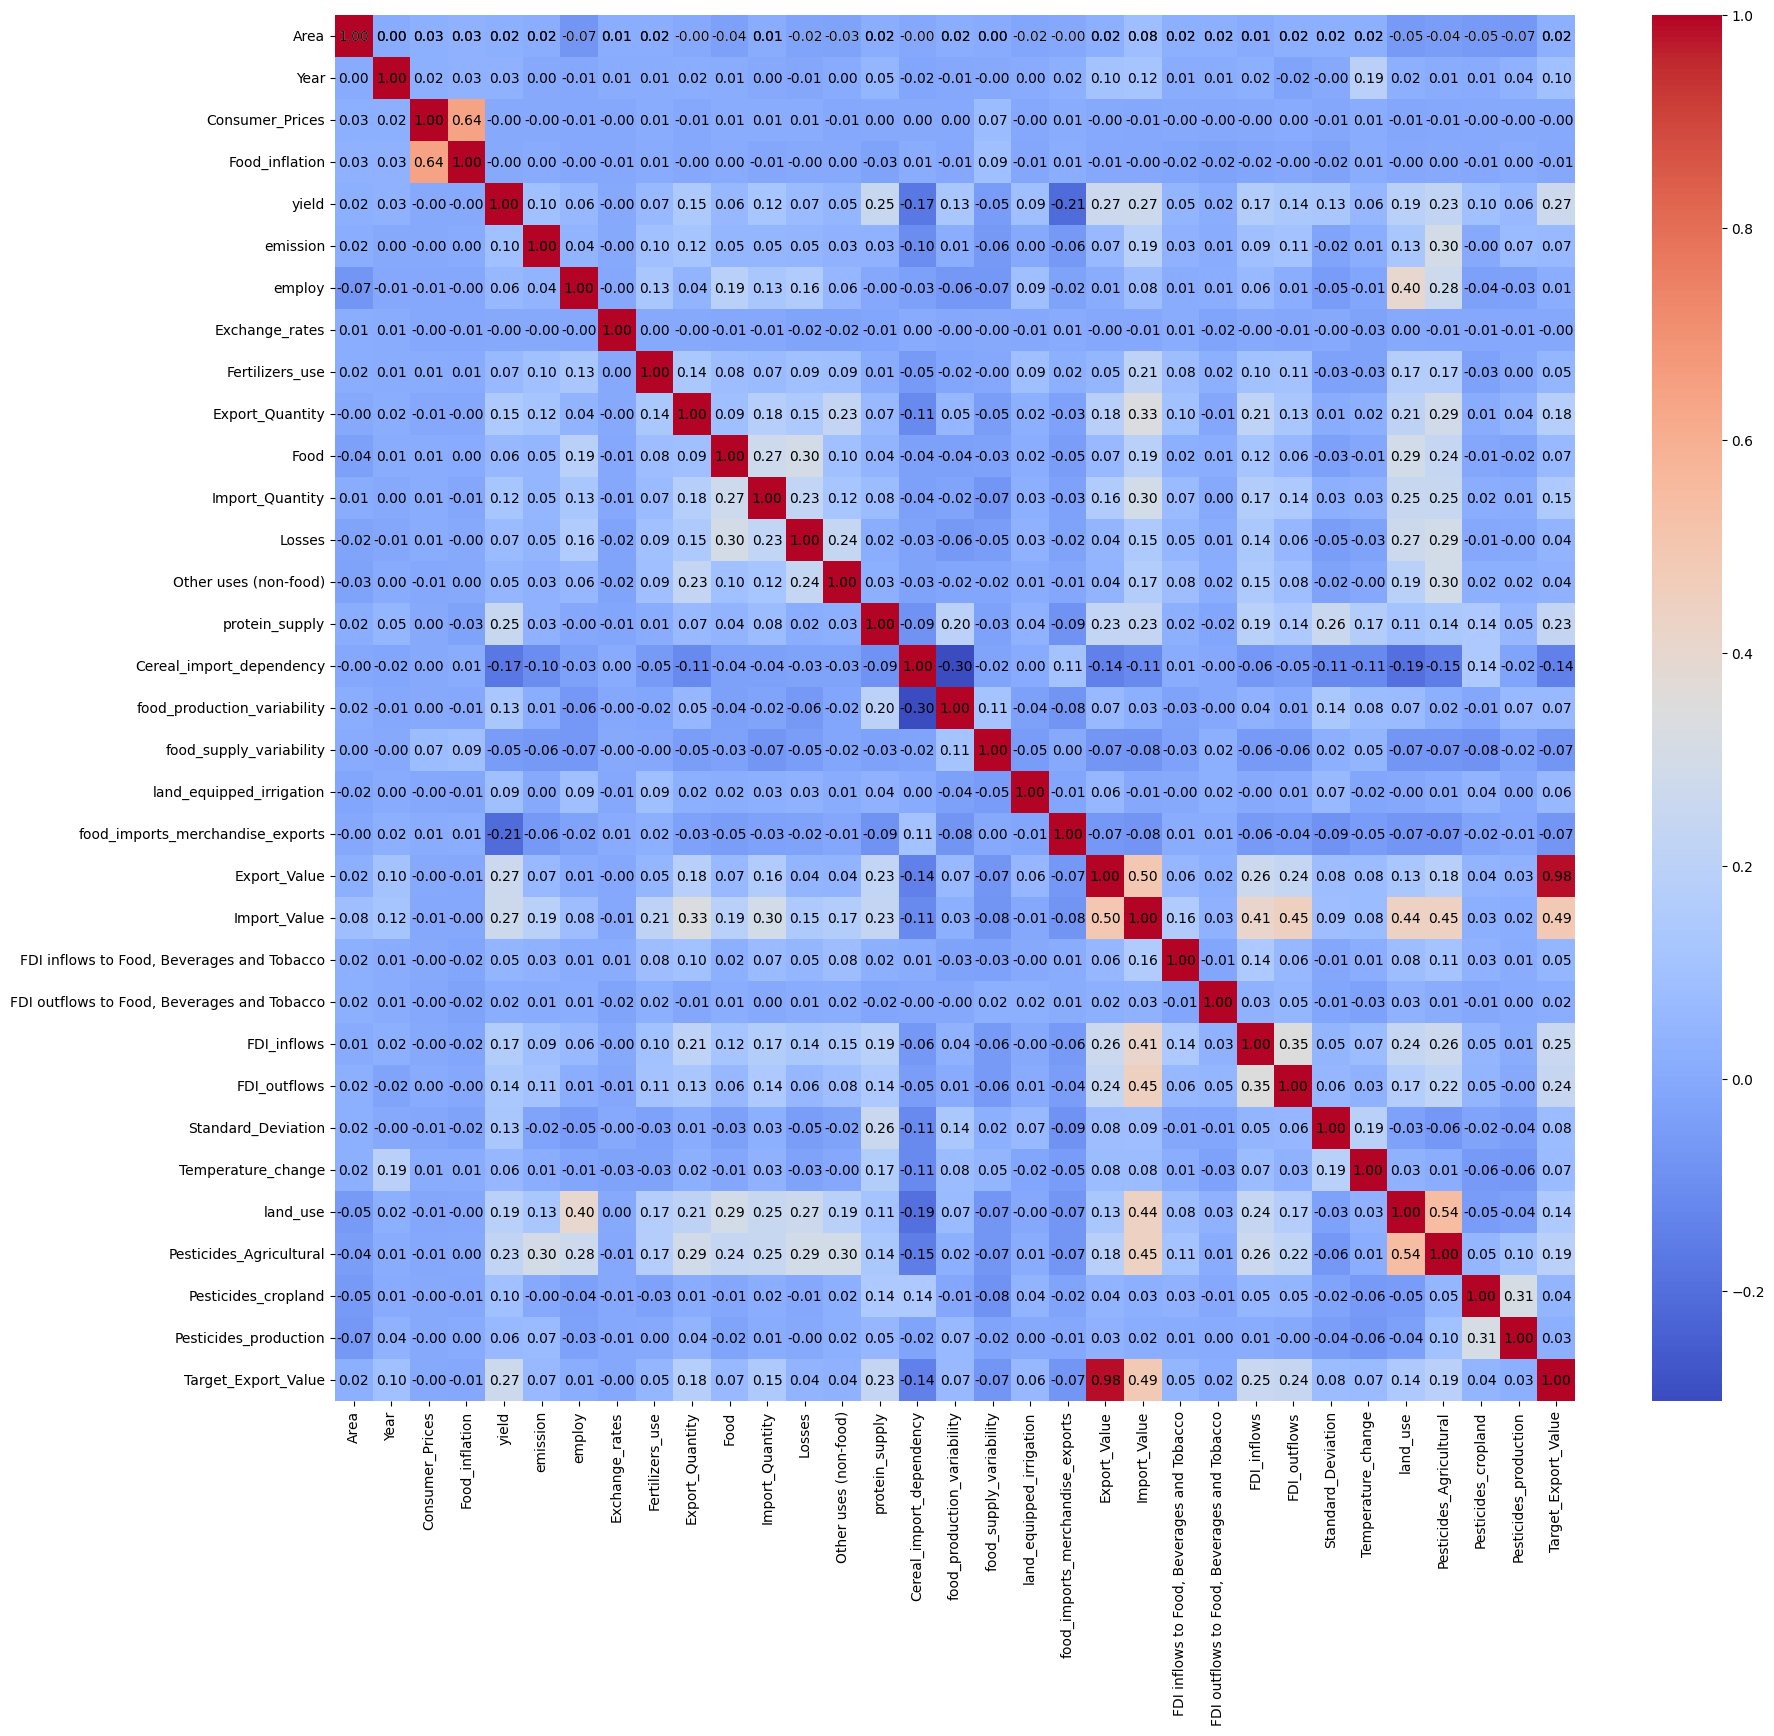

In [424]:
# Heatmap
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr(method='pearson')
plt.figure(figsize=(20, 18))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Add correlation coefficients as text to each cell
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j+0.5, i+0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]),
                 horizontalalignment='center', verticalalignment='center')

plt.show()


In [425]:

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Focus on the 'Export_Value' correlations
export_value_correlations = correlation_matrix['Target_Export_Value'].sort_values(ascending=False)

# Display the correlations with Export_Value
export_value_correlations


Target_Export_Value                            1.000000
Export_Value                                   0.984982
Import_Value                                   0.486907
yield                                          0.270941
FDI_inflows                                    0.253619
FDI_outflows                                   0.242815
protein_supply                                 0.233192
Pesticides_Agricultural                        0.191707
Export_Quantity                                0.176821
Import_Quantity                                0.147587
land_use                                       0.141182
Year                                           0.098472
Standard_Deviation                             0.076810
Temperature_change                             0.071489
Food                                           0.067125
emission                                       0.066219
food_production_variability                    0.065712
land_equipped_irrigation                       0

In [426]:
# Select only numeric columns for correlation
numeric_df = df_merge.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Focus on the 'Export_Value' correlations
export_value_correlations = correlation_matrix['Target_Export_Value'].sort_values(ascending=False)

# Display the correlations with Export_Value
export_value_correlations

Target_Export_Value                            1.000000
Export_Value                                   0.984982
Import_Value                                   0.486907
yield                                          0.270941
FDI_inflows                                    0.253619
FDI_outflows                                   0.242815
protein_supply                                 0.233192
Pesticides_Agricultural                        0.191707
Export_Quantity                                0.176821
Import_Quantity                                0.147587
land_use                                       0.141182
Year                                           0.098472
Standard_Deviation                             0.076810
Temperature_change                             0.071489
Food                                           0.067125
emission                                       0.066219
food_production_variability                    0.065712
land_equipped_irrigation                       0

In [427]:

import statsmodels.api as sm
# Assuming 'Export_Value' is your target variable and excluding non-numeric or non-relevant columns
X = df.select_dtypes(include=[np.number]).drop(columns=['Target_Export_Value'])
#X = data.select_dtypes(include=[np.number]).drop(columns=['Export_Value'])
y = df['Target_Export_Value']

# Add a constant to the model (intercept)
X = sm.add_constant(X)


In [428]:
model = sm.OLS(y, X).fit()


In [429]:
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Target_Export_Value   R-squared:                       0.971
Model:                             OLS   Adj. R-squared:                  0.971
Method:                  Least Squares   F-statistic:                     5817.
Date:                 Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                         10:21:57   Log-Likelihood:                -76891.
No. Observations:                 5607   AIC:                         1.538e+05
Df Residuals:                     5574   BIC:                         1.541e+05
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [430]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Load the dataset

data = df.copy()

# Selecting numerical features
X = data.select_dtypes(include=[np.number]).drop(columns=['Target_Export_Value'])  # Exclude the target variable

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Check the number of components and explained variance
print(f"Number of PCA components: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Add a constant to the model (intercept)
X_pca = sm.add_constant(X_pca)

# Fit the OLS model with PCA components
model_pca = sm.OLS(data['Target_Export_Value'], X_pca).fit()
print(model_pca.summary())


Number of PCA components: 29
Explained variance ratio: [0.12179811 0.06179128 0.05223924 0.04722782 0.04298061 0.03887251
 0.03634273 0.03511863 0.03361799 0.03283813 0.03164369 0.03133171
 0.02991282 0.02977578 0.02907861 0.02861762 0.02764512 0.02539313
 0.02487931 0.0243977  0.02255327 0.02216328 0.02171126 0.02078042
 0.02022495 0.01950184 0.01889614 0.01835292 0.01740214]
                             OLS Regression Results                            
Dep. Variable:     Target_Export_Value   R-squared:                       0.931
Model:                             OLS   Adj. R-squared:                  0.931
Method:                  Least Squares   F-statistic:                     2594.
Date:                 Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                         10:21:57   Log-Likelihood:                -79314.
No. Observations:                 5607   AIC:                         1.587e+05
Df Residuals:                     5577   BIC:               

In [431]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Assuming 'df' is your original DataFrame and already imported
data = df.copy()

# Selecting numerical features
X = data.select_dtypes(include=[np.number]).drop(columns=['Target_Export_Value'])

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Display the loadings of the PCA components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=X.columns)

print("PCA Component Loadings:")
print(loading_matrix)

# Add a constant to the model (intercept)
X_pca = sm.add_constant(X_pca)

# Fit the OLS model with PCA components
model_pca = sm.OLS(data['Target_Export_Value'], X_pca).fit()
print(model_pca.summary())


PCA Component Loadings:
                                                  PC1       PC2       PC3  \
Area                                        -0.000591 -0.131379  0.088994   
Year                                         0.078862 -0.154366  0.090183   
Consumer_Prices                             -0.011110  0.002014  0.877540   
Food_inflation                              -0.020141  0.015948  0.883431   
yield                                        0.435651 -0.329056 -0.016711   
emission                                     0.294507  0.022458  0.005764   
employ                                       0.305874  0.388747  0.000908   
Exchange_rates                              -0.015823  0.005747 -0.011860   
Fertilizers_use                              0.291689  0.167975  0.041006   
Export_Quantity                              0.472211  0.028928  0.006968   
Food                                         0.379503  0.333920  0.039798   
Import_Quantity                              0.45543

In [432]:
# High magnitude coefficients in PCs suggest important PCs
important_pcs = ['PC1', 'PC3', 'PC21']

# Extracting the relevant parts of the loading matrix for these important PCs
relevant_features = loading_matrix[important_pcs].abs().sort_values(by=important_pcs, ascending=False)

# Display the top contributing features for each important PC
print("Top contributing features for each important PC:")
print(relevant_features.head())


Top contributing features for each important PC:
                              PC1       PC3      PC21
Import_Value             0.763929  0.014982  0.090883
Pesticides_Agricultural  0.708909  0.012833  0.049350
land_use                 0.661099  0.030923  0.011140
FDI_inflows              0.541838  0.015080  0.182775
Export_Value             0.485322  0.010767  0.148893


In [433]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Assuming 'df' is your original DataFrame and already imported
data = df_merge.copy()

# Selecting numerical features
X = data.select_dtypes(include=[np.number]).drop(columns=['Target_Export_Value'])

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Display the loadings of the PCA components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=X.columns)

print("PCA Component Loadings:")
print(loading_matrix)

# Add a constant to the model (intercept)
X_pca = sm.add_constant(X_pca)

# Fit the OLS model with PCA components
model_pca = sm.OLS(data['Target_Export_Value'], X_pca).fit()
print(model_pca.summary())

PCA Component Loadings:
                                                  PC1       PC2       PC3  \
Area                                        -0.000591 -0.131379  0.088994   
Year                                         0.078862 -0.154366  0.090183   
Consumer_Prices                             -0.011110  0.002014  0.877540   
Food_inflation                              -0.020141  0.015948  0.883431   
yield                                        0.435651 -0.329056 -0.016711   
emission                                     0.294507  0.022458  0.005764   
employ                                       0.305874  0.388747  0.000908   
Exchange_rates                              -0.015823  0.005747 -0.011860   
Fertilizers_use                              0.291689  0.167975  0.041006   
Export_Quantity                              0.472211  0.028928  0.006968   
Food                                         0.379503  0.333920  0.039798   
Import_Quantity                              0.45543

In [434]:
# High magnitude coefficients in PCs suggest important PCs
important_pcs = ['PC1', 'PC3', 'PC21']

# Extracting the relevant parts of the loading matrix for these important PCs
relevant_features = loading_matrix[important_pcs].abs().sort_values(by=important_pcs, ascending=False)

# Display the top contributing features for each important PC
print("Top contributing features for each important PC:")
print(relevant_features.head())

Top contributing features for each important PC:
                              PC1       PC3      PC21
Import_Value             0.763929  0.014982  0.090883
Pesticides_Agricultural  0.708909  0.012833  0.049350
land_use                 0.661099  0.030923  0.011140
FDI_inflows              0.541838  0.015080  0.182775
Export_Value             0.485322  0.010767  0.148893


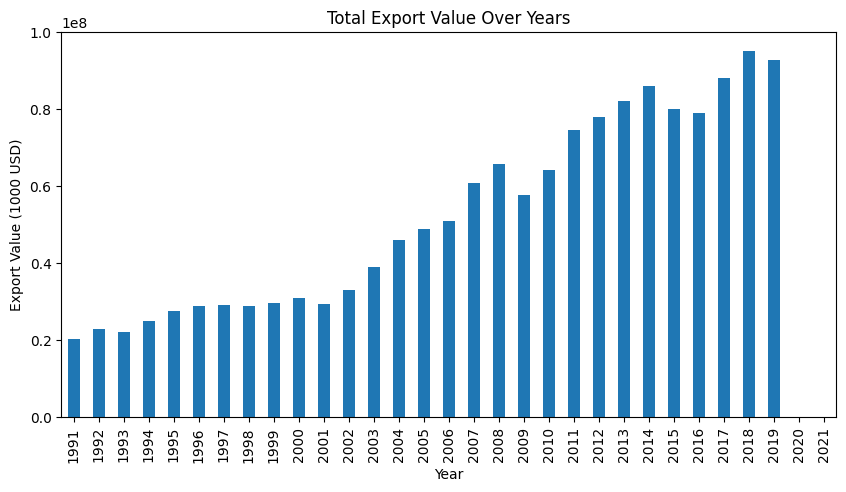

In [435]:


# Group by 'Year' and sum the 'Value' column
yearly_exports = df.groupby('Year')['Export_Value'].sum()

# Plot the results
plt.figure(figsize=(10, 5))
yearly_exports.plot(kind='bar')
plt.title('Total Export Value Over Years')
plt.xlabel('Year')
plt.ylabel('Export Value (1000 USD)')
plt.show()

In [436]:
df = df.reset_index()

In [437]:
df_merge = df.reset_index()

In [438]:
merged_data = pd.merge(df, Area_table, left_on='Area', right_on='Area Code (M49)', how='left')

# Display the first few rows of the merged dataset
merged_data.head()

,index,Area_x,Year,Consumer_Prices,Food_inflation,yield,emission,employ,Exchange_rates,Fertilizers_use,...,FDI_outflows,Standard_Deviation,Temperature_change,land_use,Pesticides_Agricultural,Pesticides_cropland,Pesticides_production,Target_Export_Value,Area_y,Area Code (M49)
0,0,4,1991,-9.479729e+07,-2662.361583,7.482291e+05,16113.593460,1.719619e+06,50.599605,-4.485828e+06,...,41570.651587,0.474715,1.502982,125120.0,160683.904197,-2.353544,0.656558,26907.0,Afghanistan,4
1,1,4,1992,1.846871e+08,-35252.395657,1.359143e+06,21567.040204,1.544036e+06,50.599605,5.857832e+06,...,-7956.747588,0.340699,1.761433,125300.0,-39617.371091,8.288585,-0.228431,24240.0,Afghanistan,4
2,2,4,1993,-7.008394e+07,4919.234797,1.602056e+06,-27559.959217,2.631055e+06,50.599605,-7.408327e+06,...,44875.878191,0.130966,1.347082,124916.0,-78096.320293,0.905740,-0.569225,39173.0,Afghanistan,4
3,3,4,1994,-7.385744e+07,4852.310394,3.647361e+05,36163.225553,5.386566e+05,425.099934,1.386154e+07,...,43733.448309,0.250377,1.724969,124432.0,83897.808646,10.437819,2.303340,44556.0,Afghanistan,4
4,4,4,1995,1.496209e+08,-17550.233694,1.447993e+06,4867.804193,-1.252955e+06,833.333333,-5.991539e+06,...,-2698.319406,0.188776,0.451613,124232.0,-185928.317498,8.495646,0.117425,44243.0,Afghanistan,4


In [439]:
# Country to Continent Mapping (simplified version using a dictionary)

country_to_continent = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Azerbaijan': 'Asia',
    'Argentina': 'South America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Armenia': 'Asia',
    'Barbados': 'North America',
    'Belgium': 'Europe',
    'Belgium-Luxembourg': 'Europe',
    'Bhutan': 'Asia',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Belize': 'North America',
    'Solomon Islands': 'Oceania',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Myanmar': 'Asia',
    'Burundi': 'Africa',
    'Belarus': 'Europe',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cabo Verde': 'Africa',
    'Central African Republic': 'Africa',
    'Sri Lanka': 'Asia',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China, mainland': 'Asia',
    'China, Taiwan Province of': 'Asia',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Democratic Republic of the Congo': 'Africa',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czechoslovakia': 'Europe', # Historical country
    'Czechia': 'Europe',
    'Benin': 'Africa',
    'Denmark': 'Europe',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Ethiopia PDR': 'Africa',
    'Ethiopia': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Polynesia': 'Oceania',
    'Djibouti': 'Africa',
    'Gabon': 'Africa',
    'Georgia': 'Asia',
    'Gambia': 'Africa',
    'Palestine': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Kiribati': 'Oceania',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'China, Hong Kong SAR': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    "Côte d'Ivoire": 'Africa',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Kazakhstan': 'Asia',
    'Jordan': 'Asia',
    'Kenya': 'Africa',
    "Democratic People's Republic of Korea": 'Asia',
    'Republic of Korea': 'Asia',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    "Lao People's Democratic Republic": 'Asia',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Latvia': 'Europe',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'China, Macao SAR': 'Asia',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Mongolia': 'Asia',
    'Republic of Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Oman': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands (Kingdom of the)': 'Europe',
    'New Caledonia': 'Oceania',
    'Vanuatu': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Guinea-Bissau': 'Africa',
    'Timor-Leste': 'Asia',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russian Federation': 'Europe', # Partially in Asia and Europe
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Viet Nam': 'Asia',
    'Slovenia': 'Europe',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'Zimbabwe': 'Africa',
    'Spain': 'Europe',
    'South Sudan': 'Africa',
    'Sudan': 'Africa',
    'Sudan (former)': 'Africa', # Historical country
    'Suriname': 'South America',
    'Eswatini': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'United Arab Emirates': 'Asia',
    'Tunisia': 'Africa',
    'Türkiye': 'Europe', # Turkey spans both Europe and Asia
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'North Macedonia': 'Europe',
    'USSR': 'Europe', # Historical country
    'Egypt': 'Africa',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'Burkina Faso': 'Africa',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Samoa': 'Oceania',
    'Yemen': 'Asia',
    'Yugoslav SFR': 'Europe', # Historical country
    'Serbia and Montenegro': 'Europe', # Historical country
    'Zambia': 'Africa'
}




# Map the continent based on the country names in the merged data
merged_data['Continent'] = merged_data['Area_y'].map(country_to_continent)

# Checking the first few rows to ensure the continent is added
merged_data.head()


,index,Area_x,Year,Consumer_Prices,Food_inflation,yield,emission,employ,Exchange_rates,Fertilizers_use,...,Standard_Deviation,Temperature_change,land_use,Pesticides_Agricultural,Pesticides_cropland,Pesticides_production,Target_Export_Value,Area_y,Area Code (M49),Continent
0,0,4,1991,-9.479729e+07,-2662.361583,7.482291e+05,16113.593460,1.719619e+06,50.599605,-4.485828e+06,...,0.474715,1.502982,125120.0,160683.904197,-2.353544,0.656558,26907.0,Afghanistan,4,Asia
1,1,4,1992,1.846871e+08,-35252.395657,1.359143e+06,21567.040204,1.544036e+06,50.599605,5.857832e+06,...,0.340699,1.761433,125300.0,-39617.371091,8.288585,-0.228431,24240.0,Afghanistan,4,Asia
2,2,4,1993,-7.008394e+07,4919.234797,1.602056e+06,-27559.959217,2.631055e+06,50.599605,-7.408327e+06,...,0.130966,1.347082,124916.0,-78096.320293,0.905740,-0.569225,39173.0,Afghanistan,4,Asia
3,3,4,1994,-7.385744e+07,4852.310394,3.647361e+05,36163.225553,5.386566e+05,425.099934,1.386154e+07,...,0.250377,1.724969,124432.0,83897.808646,10.437819,2.303340,44556.0,Afghanistan,4,Asia
4,4,4,1995,1.496209e+08,-17550.233694,1.447993e+06,4867.804193,-1.252955e+06,833.333333,-5.991539e+06,...,0.188776,0.451613,124232.0,-185928.317498,8.495646,0.117425,44243.0,Afghanistan,4,Asia


In [440]:
# Creating individual data frames for each continent
Asia_df =  merged_data[merged_data['Continent']=='Asia']
Europe_df = merged_data[merged_data['Continent']=='Europe']
Africa_df = merged_data[merged_data['Continent']=='Africa']
North_America_df = merged_data[merged_data['Continent']=='North_America']

# Check the size of each dataframe to confirm they have data
Asia_df.shape, Europe_df.shape, Africa_df.shape, North_America_df.shape

((1474, 37), (1145, 37), (1547, 37), (0, 37))

In [442]:
important_columns = [ 'Area','Export_Value', 'Import_Value', 'Pesticides_Agricultural',
                      'Cereal_import_dependency', 'yield', 'Target_Export_Value','land_use','FDI_inflows','Export_Quantity',
                     'protein_supply'

                   ]

In [443]:
list_Continent = [Asia_df, Europe_df, Africa_df]
columns = {"Area_x" : "Area"  }

custom_order = ['Area', 'yield', 'Export_Quantity',
       'protein_supply', 'Cereal_import_dependency', 'Export_Value',
       'Import_Value', 'FDI_inflows', 'land_use', 'Pesticides_Agricultural',
       'Target_Export_Value'  
               ]

           
for dfs in list_Continent:

    dfs.rename(columns=columns,inplace=True)
    for column in dfs.columns:
        if column not in important_columns:
            dfs.drop(columns=[column], inplace=True)
            #dfs.drop(columns=['index'], inplace=True)

    dfs = dfs[custom_order]

In [444]:
Asia_df.head(5)

,Area,yield,Export_Quantity,protein_supply,Cereal_import_dependency,Export_Value,Import_Value,FDI_inflows,land_use,Pesticides_Agricultural,Target_Export_Value
0,4,7.482291e+05,18677.470208,74.148077,-17.117494,51858.0,0.0,-15451.140537,125120.0,160683.904197,26907.0
1,4,1.359143e+06,2861.325816,90.469815,-67.382023,19062.0,0.0,36395.449332,125300.0,-39617.371091,24240.0
2,4,1.602056e+06,44070.813128,59.500028,9.195279,21324.0,0.0,-49094.418130,124916.0,-78096.320293,39173.0
3,4,3.647361e+05,51191.242724,94.722877,39.683461,26907.0,0.0,19151.529292,124432.0,83897.808646,44556.0
4,4,1.447993e+06,43649.376051,86.936728,17.726916,24240.0,0.0,52653.618569,124232.0,-185928.317498,44243.0


In [536]:



X = df.copy()
for column in X.columns:
    if column not in important_columns:
        X.drop(columns=[column], inplace=True)

In [446]:
X.head()

,Area,yield,Export_Quantity,protein_supply,Cereal_import_dependency,Export_Value,Import_Value,FDI_inflows,land_use,Pesticides_Agricultural,Target_Export_Value
0,4,7.482291e+05,18677.470208,74.148077,-17.117494,51858.0,0.0,-15451.140537,125120.0,160683.904197,26907.0
1,4,1.359143e+06,2861.325816,90.469815,-67.382023,19062.0,0.0,36395.449332,125300.0,-39617.371091,24240.0
2,4,1.602056e+06,44070.813128,59.500028,9.195279,21324.0,0.0,-49094.418130,124916.0,-78096.320293,39173.0
3,4,3.647361e+05,51191.242724,94.722877,39.683461,26907.0,0.0,19151.529292,124432.0,83897.808646,44556.0
4,4,1.447993e+06,43649.376051,86.936728,17.726916,24240.0,0.0,52653.618569,124232.0,-185928.317498,44243.0


In [447]:
X.columns

Index(['Area', 'yield', 'Export_Quantity', 'protein_supply',
       'Cereal_import_dependency', 'Export_Value', 'Import_Value',
       'FDI_inflows', 'land_use', 'Pesticides_Agricultural',
       'Target_Export_Value'],
      dtype='object')

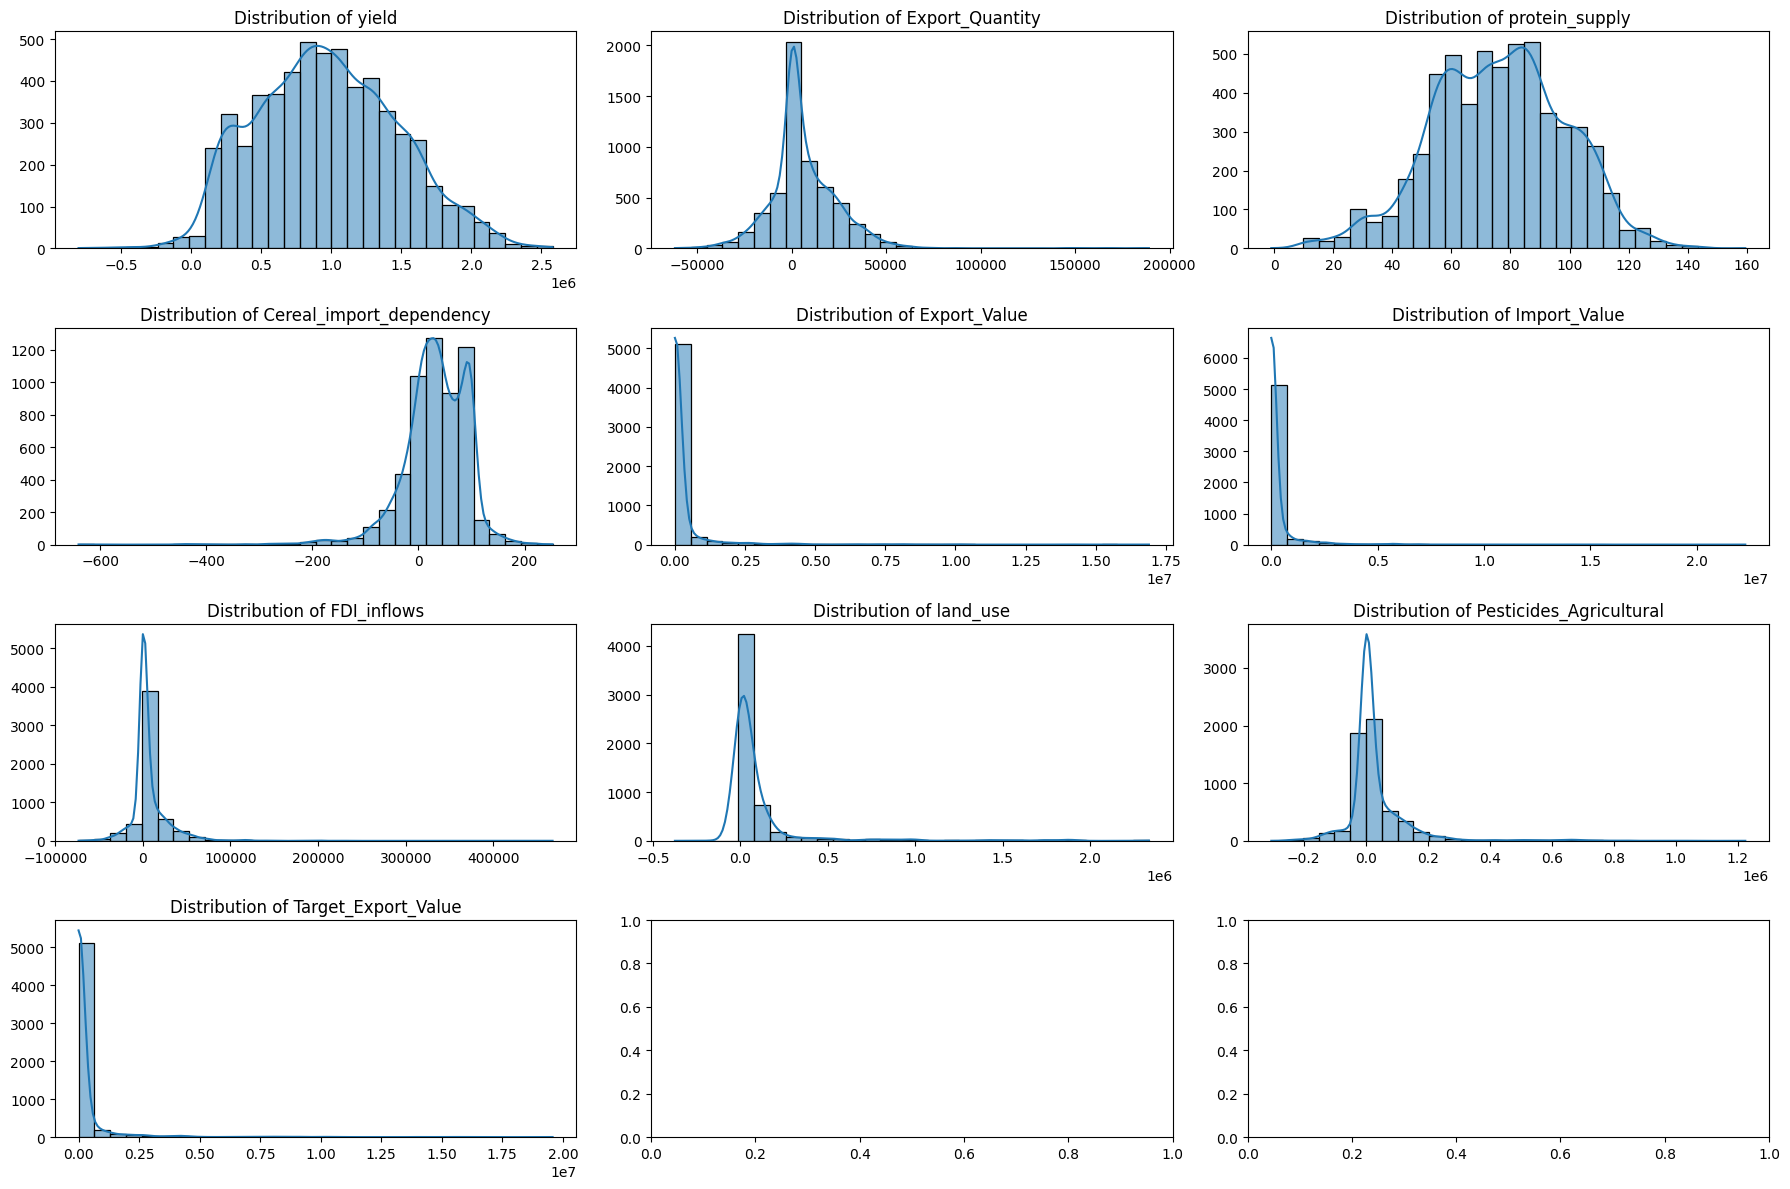

In [448]:


# Set up the figures
fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# List of some key columns to plot
columns_to_plot = [
 'yield',  'Export_Quantity',
       'protein_supply', 'Cereal_import_dependency', 'Export_Value',
       'Import_Value', 'FDI_inflows', 'land_use', 'Pesticides_Agricultural',
       'Target_Export_Value'
]


                   
# Plotting histograms for the selected columns
for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(X[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [449]:
nan_counts = X.isna().sum()

print(nan_counts)

Area                        0
yield                       0
Export_Quantity             0
protein_supply              0
Cereal_import_dependency    0
Export_Value                0
Import_Value                0
FDI_inflows                 0
land_use                    0
Pesticides_Agricultural     0
Target_Export_Value         0
dtype: int64


In [537]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return only rows where the column value is within the IQR bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns to clean
columns_to_clean = [ 
 'yield', 'Export_Quantity',
       'protein_supply', 'Cereal_import_dependency', 'Export_Value',
       'Import_Value', 'FDI_inflows', 'land_use', 'Pesticides_Agricultural',
       'Target_Export_Value'
]

# Apply the function to each column
X_total = X.copy()
for col in columns_to_clean:
    cleaned = remove_outliers_iqr(X, col)

# Show the effect on the data
original_shape = X_total.shape
cleaned_shape = cleaned.shape

(original_shape, cleaned_shape)


((5607, 11), (4644, 11))

In [538]:
# Function to remove outliers using standard deviations
def remove_outliers_std(df, column, num_std=3):
    mean = df[column].mean()
    std_dev = df[column].std()
    lower_bound = mean - num_std * std_dev
    upper_bound = mean + num_std * std_dev
    
    # Return only rows where the column value is within the calculated bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each column
#X =  X_total.copy()
for col in X:
    std_cleaned = remove_outliers_std(X, col)

# Show the effect on the data
std_cleaned_shape = std_cleaned.shape

std_cleaned_shape


(5508, 11)

In [539]:
X = std_cleaned.copy()

In [540]:
# Perform one-hot encoding on the 'Area' column
data_encoded = pd.get_dummies(X, columns=['Area'], prefix='Area', dtype=int)

# Display the first few rows of the updated dataset
data_encoded.head()



,yield,Export_Quantity,protein_supply,Cereal_import_dependency,Export_Value,Import_Value,FDI_inflows,land_use,Pesticides_Agricultural,Target_Export_Value,...,Area_834,Area_840,Area_854,Area_858,Area_860,Area_862,Area_882,Area_887,Area_891,Area_894
0,"748,229","18,677",74,-17,"51,858",0,"-15,451","125,120","160,684","26,907",...,0,0,0,0,0,0,0,0,0,0
1,"1,359,143","2,861",90,-67,"19,062",0,"36,395","125,300","-39,617","24,240",...,0,0,0,0,0,0,0,0,0,0
2,"1,602,056","44,071",60,9,"21,324",0,"-49,094","124,916","-78,096","39,173",...,0,0,0,0,0,0,0,0,0,0
3,"364,736","51,191",95,40,"26,907",0,"19,152","124,432","83,898","44,556",...,0,0,0,0,0,0,0,0,0,0
4,"1,447,993","43,649",87,18,"24,240",0,"52,654","124,232","-185,928","44,243",...,0,0,0,0,0,0,0,0,0,0


In [454]:
X.to_csv('Faosdat_kiana3.csv', index=False)

In [541]:
X =  data_encoded.copy()

In [456]:
X.describe()

,yield,Export_Quantity,protein_supply,Cereal_import_dependency,Export_Value,Import_Value,FDI_inflows,land_use,Pesticides_Agricultural,Target_Export_Value,...,Area_834,Area_840,Area_854,Area_858,Area_860,Area_862,Area_882,Area_887,Area_891,Area_894
count,5.508000e+03,5508.000000,5508.000000,5508.000000,5.508000e+03,5.508000e+03,5508.000000,5.508000e+03,5.508000e+03,5.508000e+03,...,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000
mean,9.572509e+05,6196.120033,75.761836,33.295193,1.439027e+05,2.267301e+05,6503.024890,1.004601e+05,3.117588e+04,1.679244e+05,...,0.005265,0.004357,0.005265,0.005265,0.005084,0.005265,0.005265,0.005265,0.001997,0.005265
std,4.946620e+05,18015.898903,22.223495,61.253656,4.568069e+05,9.436572e+05,21750.077925,2.714011e+05,1.053713e+05,5.127868e+05,...,0.072376,0.065872,0.072376,0.072376,0.071124,0.072376,0.072376,0.072376,0.044648,0.072376
min,-8.060187e+05,-61715.148144,-1.018849,-640.800000,0.000000e+00,0.000000e+00,-73371.950247,-3.743733e+05,-3.043545e+05,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.849282e+05,-13.985631,59.893403,3.558333,1.033275e+02,3.909250e+03,53.339327,2.448650e+03,1.960000e+02,1.320000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.369800e+05,2195.839733,76.187020,36.043973,3.074500e+03,1.578300e+04,816.098477,1.518528e+04,3.272410e+03,3.862425e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.304042e+06,15143.567167,90.666667,77.437500,4.412975e+04,8.043780e+04,8725.695760,7.290743e+04,3.508528e+04,5.529775e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.579116e+06,185811.000000,159.539300,252.826067,4.486983e+06,2.110971e+07,412323.539800,2.336953e+06,1.224184e+06,4.146455e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [457]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

In [542]:
features = X.drop(['Target_Export_Value'], axis=1)
target = X['Target_Export_Value']
scaler = StandardScaler()

# Splitting the data into training and testing sets
X_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Shape of the prepared datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4406, 207), (1102, 207), (4406,), (1102,))

In [459]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [460]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [461]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 334567145472.0000 - mae: 177498.3438 - val_loss: 280621842432.0000 - val_mae: 159870.7812
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 310291955712.0000 - mae: 173146.0312 - val_loss: 270411808768.0000 - val_mae: 153701.6406
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 237906558976.0000 - mae: 148719.0156 - val_loss: 217142312960.0000 - val_mae: 128202.5547
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 193028145152.0000 - mae: 124796.2578 - val_loss: 131580157952.0000 - val_mae: 100970.8594
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92674826240.0000 - mae: 94093.0156 - val_loss: 84930953216.0000 - val_mae: 102281.7266
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79404195840.0000 - mae: 107869.1172 - val_loss: 68663676928.0000 - val_mae: 95438.8594
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68501110784.0000 - mae: 98414.7266 - va

In [462]:
loss, mae = model.evaluate(X_test, y_test)
print("Test MSE:", loss)
print("Test MAE:", mae)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 14787535872.0000 - mae: 39314.2852
Test MSE: 16465625088.0
Test MAE: 39788.25


In [463]:
y_pred = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [464]:

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.941494018018471


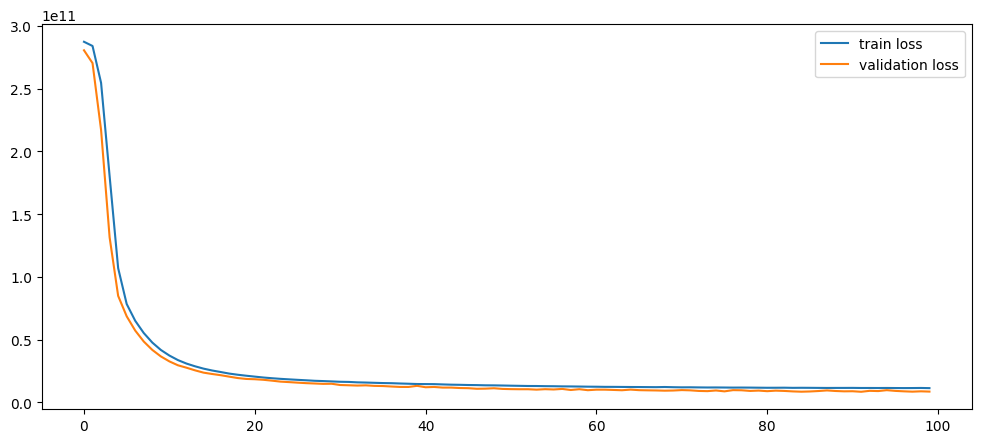

In [465]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")

ax.plot(history.history["val_loss"], label="validation loss")

ax.legend()

In [466]:

model = Sequential([
    Dense(120, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(80, activation='relu'),
    Dense(60, activation='relu'),
    Dense(40, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [467]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [468]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 311100112896.0000 - mae: 182445.9375 - val_loss: 242120441856.0000 - val_mae: 144266.2188
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 173328433152.0000 - mae: 158487.7969 - val_loss: 60999086080.0000 - val_mae: 110654.0781
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67712458752.0000 - mae: 117986.7031 - val_loss: 28773793792.0000 - val_mae: 70248.7266
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29688037376.0000 - mae: 68200.0781 - val_loss: 20197289984.0000 - val_mae: 54713.0586
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18802495488.0000 - mae: 53263.6445 - val_loss: 16083131392.0000 - val_mae: 47789.9961
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17868738560.0000 - mae: 48888.3711 - val_loss: 14199008256.0000 - val_mae: 44847.8008
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17037939712.0000 - mae: 46139.5703 - val_loss: 13

In [469]:
y_pred = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [470]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.9398785914072183


In [471]:
loss, mae = model.evaluate(X_test, y_test)
print("Test MSE:", loss)
print("Test MAE:", mae)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 14630685696.0000 - mae: 42568.3008
Test MSE: 16920261632.0
Test MAE: 43822.390625


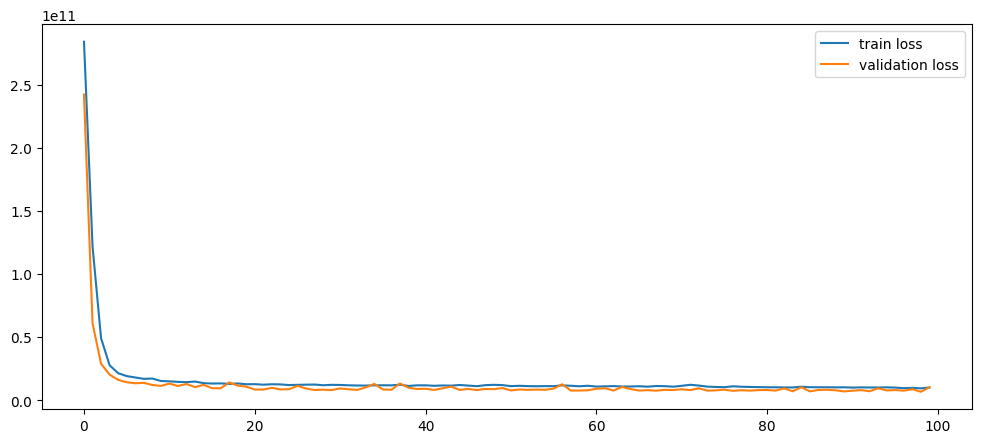

In [472]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")

ax.plot(history.history["val_loss"], label="validation loss")

ax.legend()

In [543]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    
    Dense(120, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(100, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(80, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(60, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(40, activation='relu'),
    Dropout(0.2),
    Dense(20, activation='relu'),
    #Dropout(0.2),
    Dense(1)       # Output layer
])

In [544]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [545]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 266187751424.0000 - mae: 164265.6875 - val_loss: 243404554240.0000 - val_mae: 147312.0469
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 142862303232.0000 - mae: 162276.6250 - val_loss: 62448586752.0000 - val_mae: 129151.8125
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59330039808.0000 - mae: 118019.0938 - val_loss: 32491100160.0000 - val_mae: 77322.8906
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30907756544.0000 - mae: 71380.8672 - val_loss: 23812816896.0000 - val_mae: 58501.4766
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30730065920.0000 - mae: 63130.5664 - val_loss: 19571838976.0000 - val_mae: 50926.3438
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24765294592.0000 - mae: 55753.1953 - val_loss: 16996974592.0000 - val_mae: 46625.5508
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33082365952.0000 - mae: 58984.9375 - val_loss: 15

In [546]:
y_pred = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [477]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.944041245810603


In [478]:

loss, mae = model.evaluate(X_test, y_test)
print("Test MSE:", loss)
print("Test MAE:", mae)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 13564834816.0000 - mae: 39156.5742
Test MSE: 15748747264.0
Test MAE: 40099.49609375


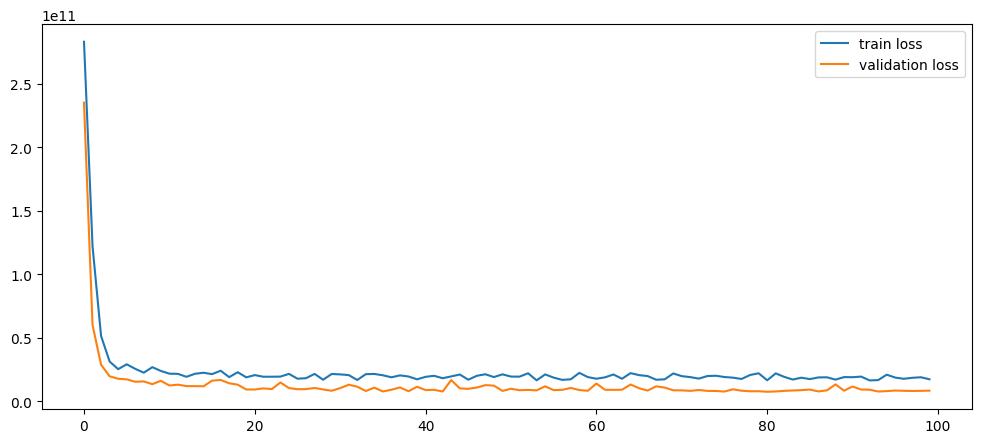

In [479]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")

ax.plot(history.history["val_loss"], label="validation loss")

ax.legend()

In [547]:


# Convert to pandas Series, reset indices to ensure alignment
y_pred_series = pd.Series(y_pred.flatten(), name='Predicted').reset_index(drop=True)
y_test_series = pd.Series(y_test, name='Actual').reset_index(drop=True)

# Create DataFrame
results_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_pred_series
})


In [548]:
pd.options.display.float_format = '{:,.0f}'.format

In [549]:

results_df['ID'] = [i for i in range(len(results_df))]

In [550]:
columns_order = ['ID','Actual','Predicted']


In [551]:
results_df = results_df[columns_order]

In [552]:
results_df.head(20)

,ID,Actual,Predicted
0,0,"614,409","629,337"
1,1,58,874
2,2,"5,902","6,141"
3,3,0,"1,130"
4,4,"30,464","39,883"
5,5,"2,110","74,775"
6,6,"1,767,141","2,530,353"
7,7,7,"1,299"
8,8,10,"1,140"
9,9,513,"1,187"


In [553]:
results_df.to_csv('Faosdat_kianafinal.csv', index=False)

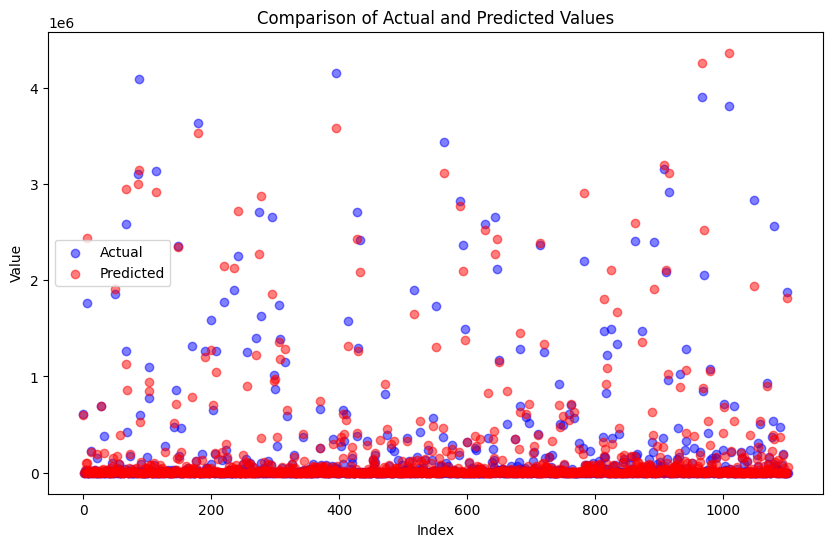

In [487]:


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Actual'], color='blue', label='Actual', alpha=0.5)
plt.scatter(results_df.index, results_df['Predicted'], color='red', label='Predicted', alpha=0.5)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


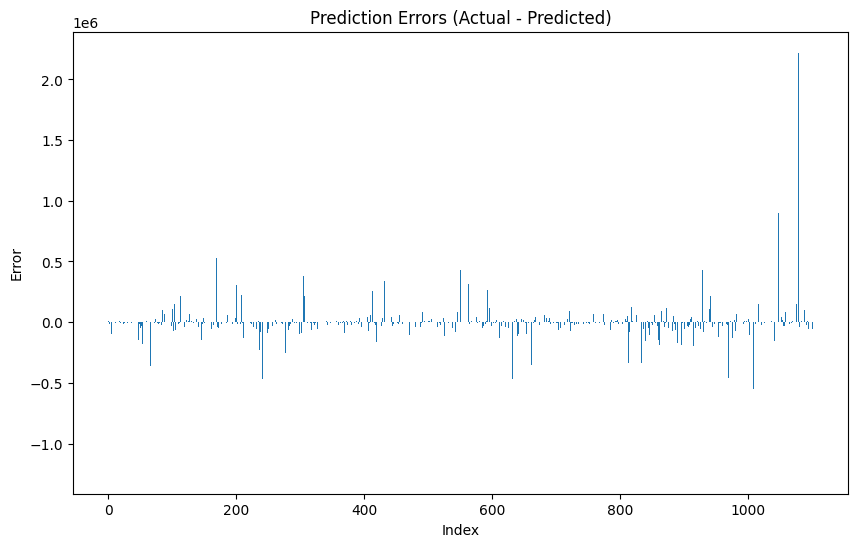

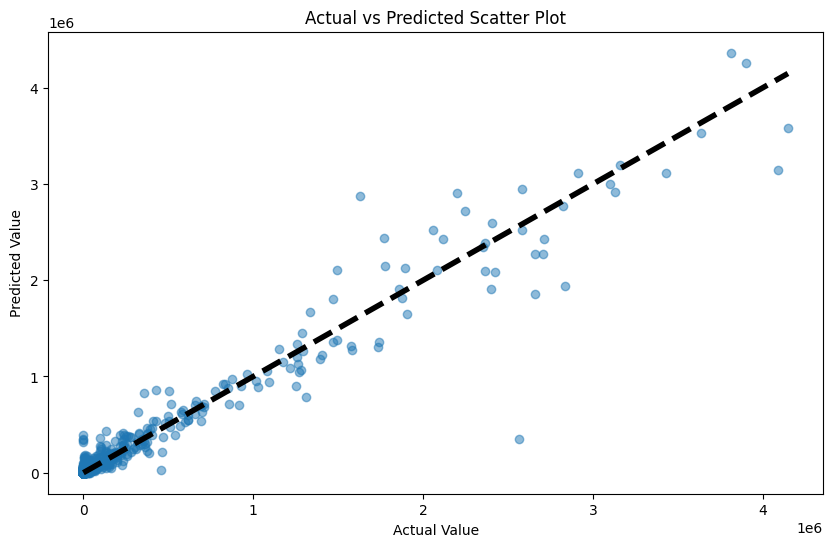

In [488]:
# Plot with error bars
plt.figure(figsize=(10, 6))
errors = results_df['Actual'] - results_df['Predicted']
plt.bar(results_df.index, errors)
plt.title('Prediction Errors (Actual - Predicted)')
plt.xlabel('Index')
plt.ylabel('Error')
plt.show()

# Perfect fit line and scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=4)
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [489]:
results_df.to_csv('Faosdat_df_result.csv', index=False)

In [490]:
X = df.copy()
for column in X.columns:
    if column not in important_columns:
        X.drop(columns=[column], inplace=True)

In [491]:
# Perform one-hot encoding on the 'Area' column
X = pd.get_dummies(X, columns=['Area'], prefix='Area', dtype=int)

# Display the first few rows of the updated dataset




In [492]:
features = X.drop(['Target_Export_Value'], axis=1)
target = X['Target_Export_Value']
scaler = StandardScaler()

# Splitting the data into training and testing sets
X_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Shape of the prepared datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4485, 208), (1122, 208), (4485,), (1122,))

In [493]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    
    Dense(120, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(100, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(80, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(60, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(40, activation='relu'),
    Dropout(0.2),
    Dense(20, activation='relu'),
    #Dropout(0.2),
    Dense(1)       # Output layer
])

In [494]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [495]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1990979485696.0000 - mae: 311889.4062 - val_loss: 1465530843136.0000 - val_mae: 288478.9688
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1668819976192.0000 - mae: 373080.7500 - val_loss: 528542367744.0000 - val_mae: 332406.8438
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 526391115776.0000 - mae: 285808.8125 - val_loss: 246693625856.0000 - val_mae: 186361.6875
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 249654329344.0000 - mae: 165453.4375 - val_loss: 140427624448.0000 - val_mae: 121358.8672
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113059250176.0000 - mae: 103065.0312 - val_loss: 155649130496.0000 - val_mae: 114765.0000
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181910274048.0000 - mae: 109795.7188 - val_loss: 89769222144.0000 - val_mae: 99645.2266
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132105928704.0000 - mae: 107142.

In [496]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")
loss, mae = model.evaluate(X_test, y_test)
print("Test MSE:", loss)
print("Test MAE:", mae)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R-squared (R2): 0.9539936708336654
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 39857537024.0000 - mae: 70537.8359
Test MSE: 47158308864.0
Test MAE: 73318.8125


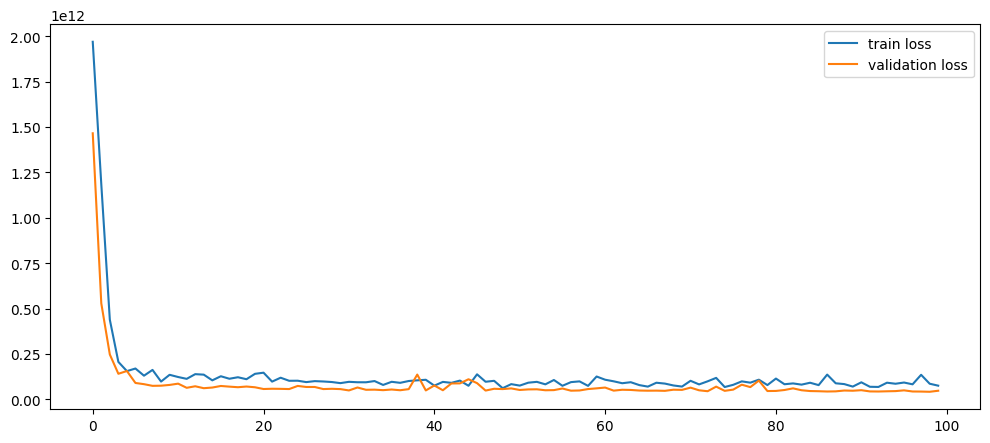

In [497]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")

ax.plot(history.history["val_loss"], label="validation loss")

ax.legend()

In [498]:

# Convert to pandas Series, reset indices to ensure alignment
y_pred_series = pd.Series(y_pred.flatten(), name='Predicted').reset_index(drop=True)
y_test_series = pd.Series(y_test, name='Actual').reset_index(drop=True)

# Create DataFrame
results_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_pred_series
})
pd.options.display.float_format = '{:,.0f}'.format
results_df['ID'] = [i for i in range(len(results_df))]
columns_order = ['ID','Actual','Predicted']
results_df = results_df[columns_order]
results_df.head(20)

,ID,Actual,Predicted
0,0,"80,395","46,153"
1,1,317,386
2,2,0,"2,477"
3,3,170,"1,627"
4,4,"256,993","97,207"
5,5,176,"2,124"
6,6,"1,099","2,415"
7,7,"1,664","4,301"
8,8,443,585
9,9,"212,995","184,188"


In [499]:
results_df.to_csv('Faosdat_kianafw.csv', index=False)

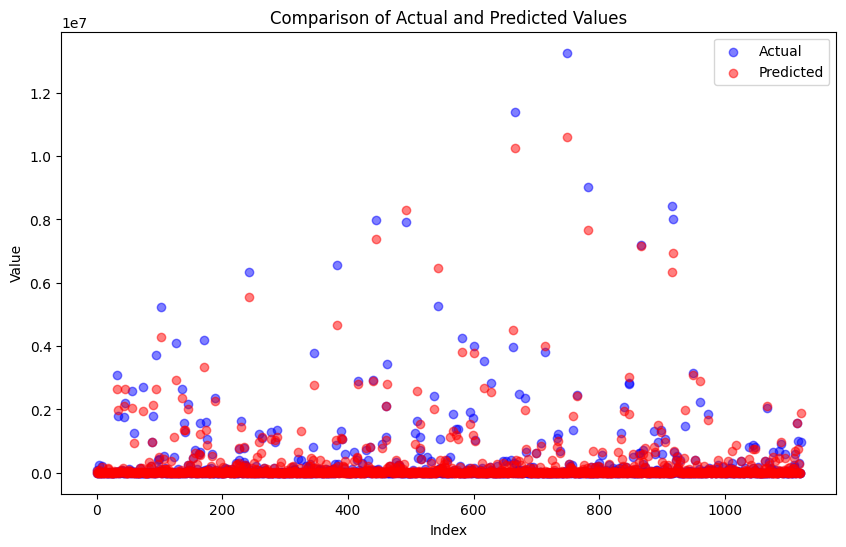

In [500]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Actual'], color='blue', label='Actual', alpha=0.5)
plt.scatter(results_df.index, results_df['Predicted'], color='red', label='Predicted', alpha=0.5)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

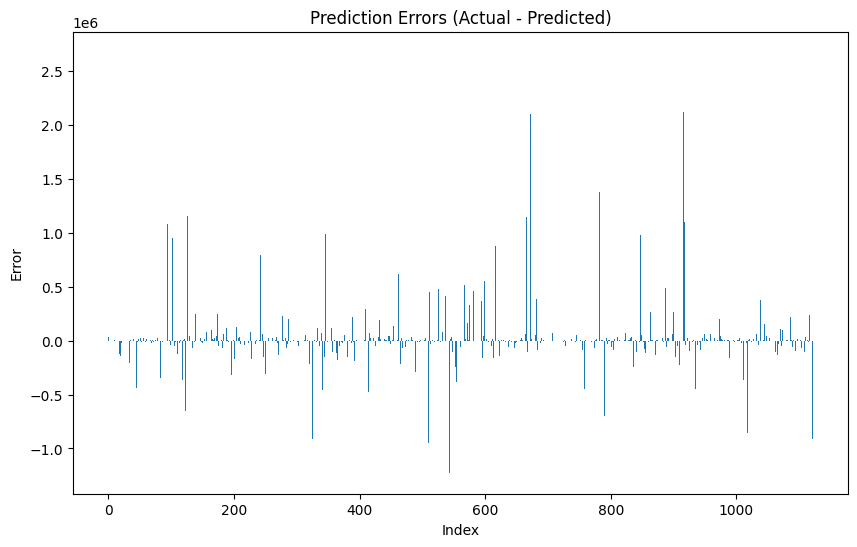

In [501]:
# Plot with error bars
plt.figure(figsize=(10, 6))
errors = results_df['Actual'] - results_df['Predicted']
plt.bar(results_df.index, errors)
plt.title('Prediction Errors (Actual - Predicted)')
plt.xlabel('Index')
plt.ylabel('Error')
plt.show()

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step


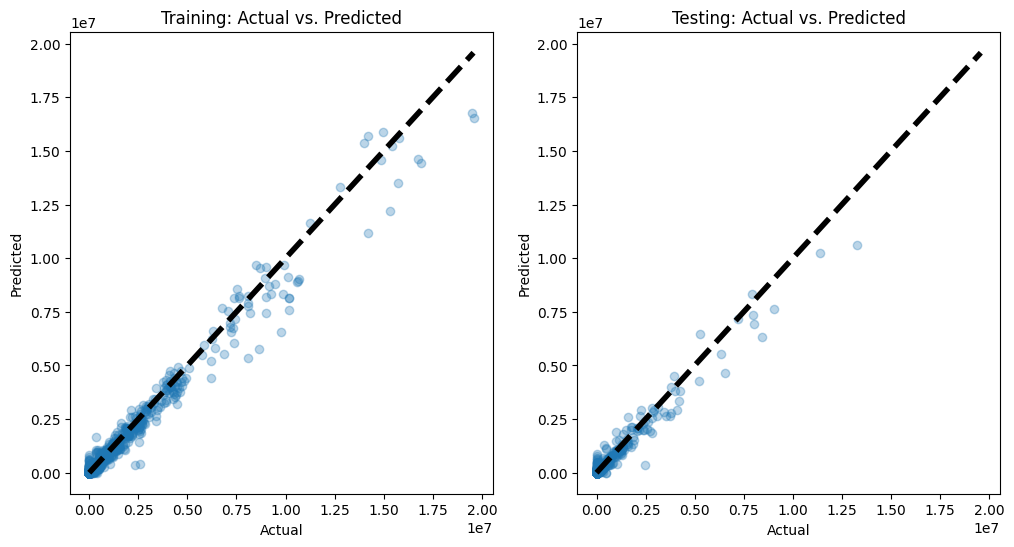

In [502]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
plt.title('Training: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
plt.title('Testing: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [503]:
Area_table.head()

,Area,Area Code (M49)
0,Afghanistan,4
1,Albania,8
2,Algeria,12
3,Angola,24
4,Antigua and Barbuda,28


In [504]:
filtered_area_table = Area_table.loc[Area_table['Area'] == 'India']
filtered_area_table

,Area,Area Code (M49)
86,India,356


In [506]:
# Perform one-hot encoding on the 'Area' column
Asia_df = pd.get_dummies(Asia_df, columns=['Area'], prefix='Area', dtype=int)

# Display the first few rows of the updated dataset
Asia_df.head()

,yield,Export_Quantity,protein_supply,Cereal_import_dependency,Export_Value,Import_Value,FDI_inflows,land_use,Pesticides_Agricultural,Target_Export_Value,...,Area_682,Area_702,Area_704,Area_760,Area_762,Area_764,Area_784,Area_795,Area_860,Area_887
0,"748,229","18,677",74,-17,"51,858",0,"-15,451","125,120","160,684","26,907",...,0,0,0,0,0,0,0,0,0,0
1,"1,359,143","2,861",90,-67,"19,062",0,"36,395","125,300","-39,617","24,240",...,0,0,0,0,0,0,0,0,0,0
2,"1,602,056","44,071",60,9,"21,324",0,"-49,094","124,916","-78,096","39,173",...,0,0,0,0,0,0,0,0,0,0
3,"364,736","51,191",95,40,"26,907",0,"19,152","124,432","83,898","44,556",...,0,0,0,0,0,0,0,0,0,0
4,"1,447,993","43,649",87,18,"24,240",0,"52,654","124,232","-185,928","44,243",...,0,0,0,0,0,0,0,0,0,0


In [507]:
features_Asia = Asia_df .drop(['Target_Export_Value'], axis=1)
target_Asia = Asia_df ['Target_Export_Value']


# Splitting the data into training and testing sets
X_scaled_Asia = scaler.fit_transform(features_Asia)
X_train_Asia, X_test_Asia, y_train_Asia, y_test_Asia = train_test_split(X_scaled_Asia, target_Asia, test_size=0.2, random_state=42)

In [508]:
model = Sequential([
    
    Dense(120, activation='relu', input_shape=(X_train_Asia.shape[1],)),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(100, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(80, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(60, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the nodes in the previous layer during training
    Dense(40, activation='relu'),
    Dropout(0.2),
    Dense(20, activation='relu'),
    #Dropout(0.2),
    Dense(1)       # Output layer
])

In [509]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [510]:

history = model.fit(X_train_Asia, y_train_Asia, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 173267550208.0000 - mae: 125078.4844 - val_loss: 125641883648.0000 - val_mae: 102771.8906
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174151385088.0000 - mae: 128475.4922 - val_loss: 125445668864.0000 - val_mae: 102508.1953
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 170574888960.0000 - mae: 118304.2500 - val_loss: 121092923392.0000 - val_mae: 99757.2578
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108419301376.0000 - mae: 99028.6406 - val_loss: 85795340288.0000 - val_mae: 104835.1797
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96859635712.0000 - mae: 135476.7344 - val_loss: 68825907200.0000 - val_mae: 149876.4844
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52161421312.0000 - mae: 126713.1016 - val_loss: 56303951872.0000 - val_mae: 120468.7969
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37481668608.0000 - mae: 103064.6641 - val_loss: 509019

In [511]:
y_pred = model.predict(X_test_Asia)
r2 = r2_score(y_test_Asia, y_pred)
print(f"R-squared (R2): {r2}")
loss, mae = model.evaluate(X_test_Asia, y_test_Asia)
print("Test MSE:", loss)
print("Test MAE:", mae)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R-squared (R2): 0.9029572464142291
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11265034240.0000 - mae: 42775.8555
Test MSE: 15932566528.0
Test MAE: 50186.41796875


In [512]:
filtered_data_country = Asia_df[Asia_df['Area_356'] == 1]

In [513]:
filtered_data_country.head()

,yield,Export_Quantity,protein_supply,Cereal_import_dependency,Export_Value,Import_Value,FDI_inflows,land_use,Pesticides_Agricultural,Target_Export_Value,...,Area_682,Area_702,Area_704,Area_760,Area_762,Area_764,Area_784,Area_795,Area_860,Area_887
2355,"792,514","-35,648",58,83,"7,199","2,515","11,456","764,640","182,778","14,673",...,0,0,0,0,0,0,0,0,0,0
2356,"1,046,545","-1,848",97,-35,"9,953","3,466","-15,132","763,821","65,526","12,073",...,0,0,0,0,0,0,0,0,0,0
2357,"630,916","11,722",90,-5,"11,960","3,034","36,309","764,533","64,770","12,709",...,0,0,0,0,0,0,0,0,0,0
2358,"1,241,004","-2,933",71,95,"14,673","5,692","27,765","765,775","60,633","8,877",...,0,0,0,0,0,0,0,0,0,0
2359,"166,112","11,807",49,-40,"12,073","10,485","-14,026","765,799","91,402","12,544",...,0,0,0,0,0,0,0,0,0,0


In [514]:
features_c = filtered_data_country.drop(['Target_Export_Value'], axis=1)
target_c = filtered_data_country['Target_Export_Value']


# Splitting the data into training and testing sets
X_scaled_c = scaler.fit_transform(features_c)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled_c, target_c, test_size=0.2, random_state=42)

In [515]:
model.fit(X_train_c, y_train_c)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13459536896.0000 - mae: 84045.5625


In [516]:

y_pred_c = model.predict(X_test_c)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [517]:
y_test_pred_c = model.predict(X_test_c)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [518]:
y_train_pred_c = model.predict(X_train_c)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [519]:
y_train_pred_c_scaled = scaler.fit_transform(y_train_pred_c.reshape(-1, 1))
y_train_c_scaled = scaler.fit_transform( y_train_c.values.reshape(-1, 1))
y_test_pred_c_scaled = scaler.fit_transform(y_test_pred_c.reshape(-1, 1))
y_test_c_scaled = scaler.fit_transform( y_test_c.values.reshape(-1, 1))

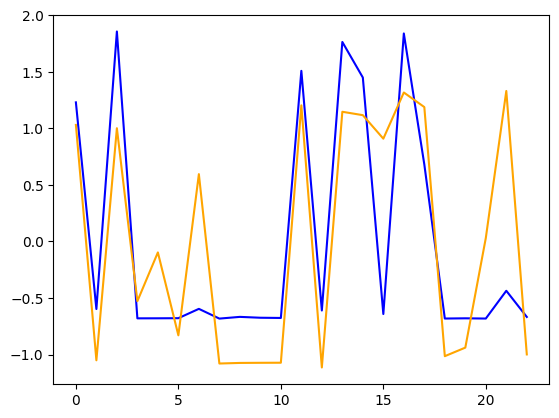

In [520]:
fig, ax = plt.subplots()
ax.plot(y_train_pred_c_scaled, label='Predicted Values', color='blue')
ax.plot(y_train_c_scaled, label='Actual Values', color='orange')

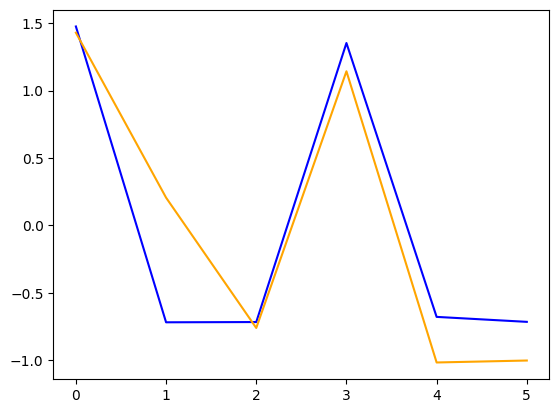

In [521]:
fig, ax = plt.subplots()
ax.plot(y_test_pred_c_scaled, label='Predicted Values', color='blue')
ax.plot(y_test_c_scaled, label='Actual Values', color='orange')

In [522]:
y_pred_series = pd.Series(y_pred_c.flatten(), name='Predicted').reset_index(drop=True)
y_test_series = pd.Series(y_test_c, name='Actual').reset_index(drop=True)

# Create DataFrame
results_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_pred_series
})
pd.options.display.float_format = '{:,.0f}'.format
results_df['ID'] = [i for i in range(len(results_df))]
columns_order = ['ID','Actual','Predicted']
results_df = results_df[columns_order]
results_df.head(20)

,ID,Actual,Predicted
0,0,"221,121","486,620"
1,1,"120,613",833
2,2,"41,224","1,247"
3,3,"197,598","459,445"
4,4,"20,202","9,719"
5,5,"21,392","1,568"


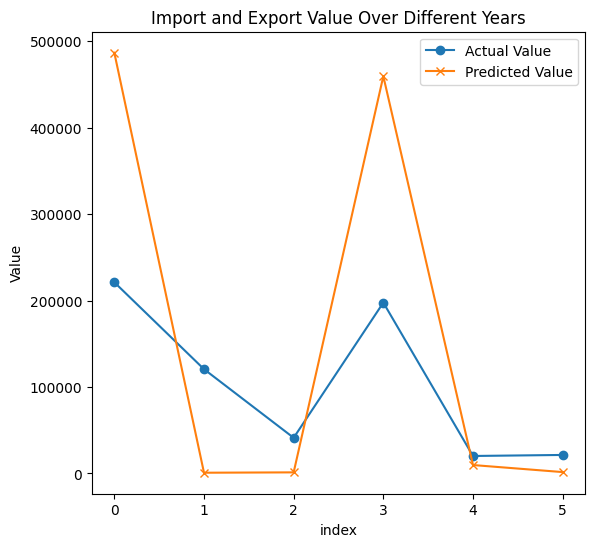

In [523]:


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # This means 1 row, 2 columns, first subplot
plt.plot(results_df.index, results_df['Actual'], marker='o', label='Actual Value')
plt.plot(results_df.index, results_df['Predicted'], marker='x', label='Predicted Value')
plt.title('Import and Export Value Over Different Years')
plt.xlabel('index')
plt.ylabel('Value')
plt.legend()

In [524]:
y_pred_series = pd.Series(y_train_pred_c.flatten(), name='Predicted').reset_index(drop=True)
y_test_series = pd.Series(y_train_c, name='Actual').reset_index(drop=True)

# Create DataFrame
results_df = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': y_pred_series
})
pd.options.display.float_format = '{:,.0f}'.format
results_df['ID'] = [i for i in range(len(results_df))]
columns_order = ['ID','Actual','Predicted']
results_df = results_df[columns_order]
results_df.head(20)

,ID,Actual,Predicted
0,0,"204,563","365,405"
1,1,"14,673","17,091"
2,2,"201,891","484,874"
3,3,"62,380","1,382"
4,4,"101,684","1,457"
5,5,"34,808","1,634"
6,6,"164,845","17,371"
7,7,"12,073",955
8,8,"12,544","3,852"
9,9,"12,649","2,394"


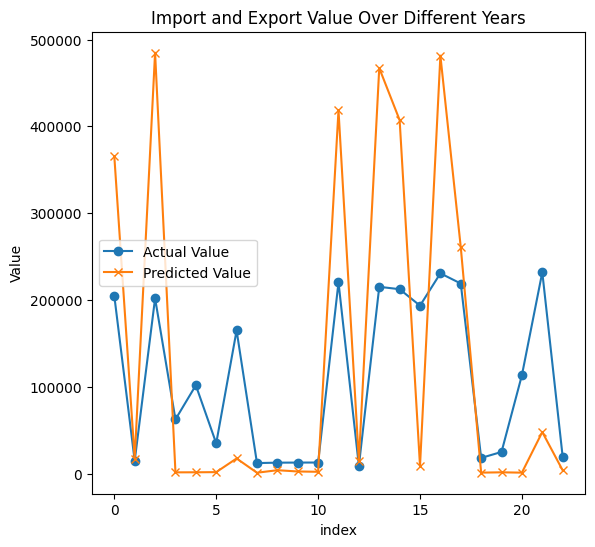

In [525]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # This means 1 row, 2 columns, first subplot
plt.plot(results_df.index, results_df['Actual'], marker='o', label='Actual Value')
plt.plot(results_df.index, results_df['Predicted'], marker='x', label='Predicted Value')
plt.title('Import and Export Value Over Different Years')
plt.xlabel('index')
plt.ylabel('Value')
plt.legend()

In [526]:
# Change the file path to the location where your CSV file is stored
file_path = 'Food trade indicators - FAOSTAT_data_en_2-22-2024.csv'

# Read the CSV file
df9 = pd.read_csv(file_path)

In [527]:
Country_Code = 356

In [528]:
df9_country = df9[df9['Area Code (M49)'] == Country_Code]

In [529]:
df9_country_sort = df9_country.sort_values(by='Year')

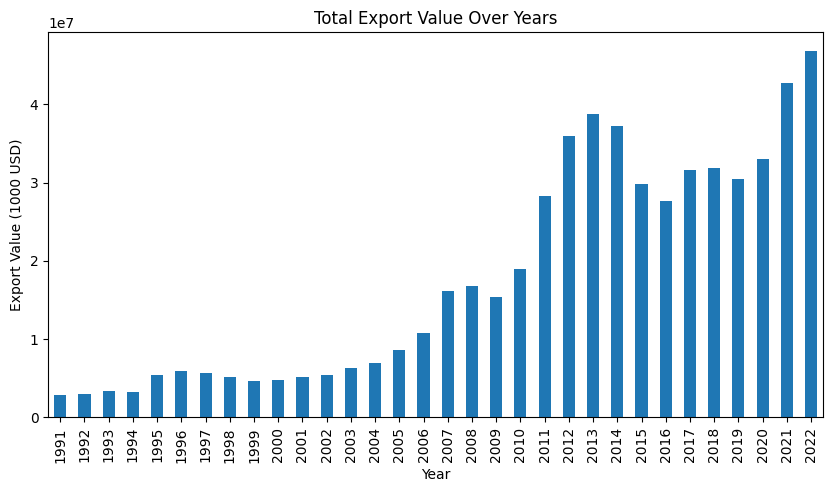

In [530]:
# Filter for rows where 'Element' column contains "Export Value"
export_data = df9_country_sort[df9_country_sort['Element'].str.contains("Export")]

# Group by 'Year' and sum the 'Value' column
yearly_exports = export_data.groupby('Year')['Value'].sum()

# Plot the results
plt.figure(figsize=(10, 5))
yearly_exports.plot(kind='bar')
plt.title('Total Export Value Over Years')
plt.xlabel('Year')
plt.ylabel('Export Value (1000 USD)')
plt.show()


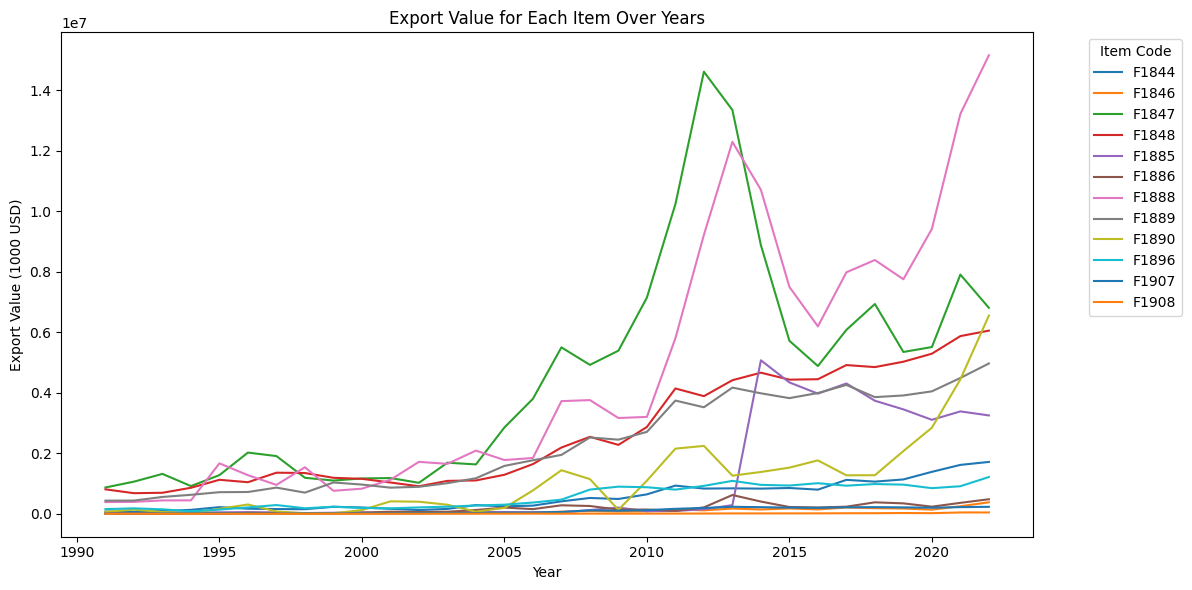

In [531]:
# Filter for rows where 'Element' column contains "Export Value"
export_data = df9_country_sort[df9_country_sort['Element'].str.contains("Export")]

# Pivot the data to have years as index, items as columns, and sum of export values as cell values
pivot_table = export_data.pivot_table(values='Value', index='Year', columns='Item Code (CPC)', aggfunc='sum')

# Plot the results
pivot_table.plot(kind='line', figsize=(12, 6))

plt.title('Export Value for Each Item Over Years')
plt.xlabel('Year')
plt.ylabel('Export Value (1000 USD)')
plt.legend(title='Item Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [532]:
df9_country_sort = df9_country_sort.loc[
    (df9_country_sort['Item'] != "Dairy Products and Eggs") & 
    (df9_country_sort['Item'] != 'Meat and Meat Preparations') 
]


In [533]:
df9_country_sort = df9_country_sort.reset_index(drop=True)

In [534]:
df9_country_sort = df9_country.sort_values(by='Year')

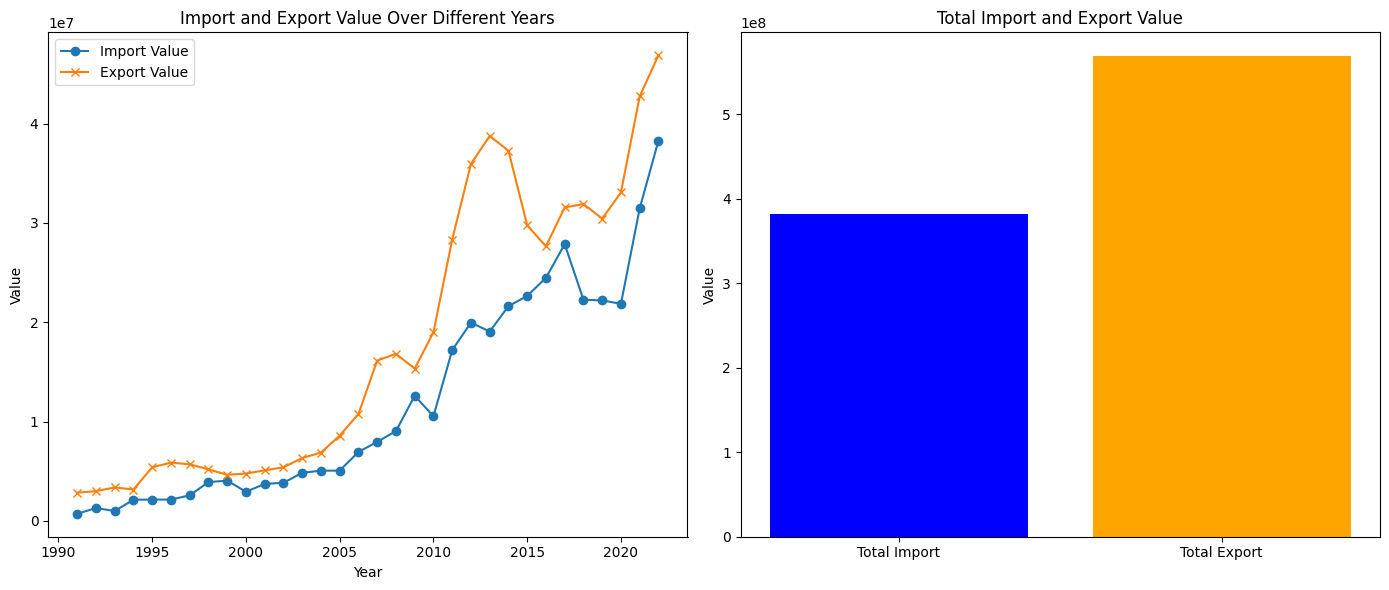

In [535]:
import_data = df9_country_sort[df9_country_sort['Element'] == "Import Value"].pivot_table(index='Year', values='Value', aggfunc='sum')
export_data = df9_country_sort[df9_country_sort['Element'] == "Export Value"].pivot_table(index='Year', values='Value', aggfunc='sum')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # This means 1 row, 2 columns, first subplot
plt.plot(import_data.index, import_data['Value'], marker='o', label='Import Value')
plt.plot(export_data.index, export_data['Value'], marker='x', label='Export Value')
plt.title('Import and Export Value Over Different Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Second Plot: Total Import and Export Value Summed Over All Years
# Sum the values
total_import = import_data['Value'].sum()
total_export = export_data['Value'].sum()

plt.subplot(1, 2, 2)  # This means 1 row, 2 columns, second subplot
plt.bar('Total Import', total_import, color='blue')
plt.bar('Total Export', total_export, color='orange')
plt.title('Total Import and Export Value')
plt.ylabel('Value')

plt.tight_layout()  # Adjust the layout
plt.show()
